> **Project Title:** TransBorder Freight Data Analysis<br>
> **Project Owner:** Berlinda Anaman<br>
> **Email:** Berlana.d@gmail.com<br>
> **Github Profile:** [Berlinda Anaman](https://github.com/Berl-cloud)<br>
> **LinkedIn Profile:** [Berlinda Anaman](https://www.linkedin.com/in/berlinda-anaman/)

## Table of Contents<a id='mu'></a>

* [Business Problem Understanding](#bpu)
    * [Problem Statement](#ps)
    * [Project Goal](#pg)
    * [Information Needed](#in)
    * [Methodology](#my)
* [Data Preparation](#dp)
    * [Data Quality Assessment](#dqa)
    * [Data Cleaning and Preprocessing](#dcp)
* [Exploratory Data Analysis and Visualisation](#edav)
* [Conclusion and Recommendation](#cr)

## 1. Business Problem Understanding<a id='bpu'></a>

[Move Up](#mu)

<p style="text-align:justify;">The first step in approaching a data science problem is problem understanding. This step is very important since it allows us to know the kind of decisions we want to make, the information or data that will be needed to inform those decisions and finally, the kind of analysis that will be used to arrive at those decisions. In a nutshell, developing a mental model of the problem allows us to properly structure potentially relevant information needed to solve the problem.</p>

### 1.1 Problem Statement <a id='ps'></a>

The increasing complexity of transportation systems poses challenges such as safety, congestion, infrastructure stress, environmental impact, and economic disruptions. The Bureau of Transportation Statistics (BTS) collects detailed freight data across different modes (road, rail, air, and water) to monitor these challenges. However, raw data alone does not provide actionable insight.

This project aims to explore BTS freight data to uncover patterns, inefficiencies, and risks in cross-border freight movement, enabling data-driven decisions to improve efficiency, safety, and sustainability.


### 1.2 Project Goal <a id='pg'></a>

The goal of this project is to analyze cross-border freight data from the BTS to:

- Identify freight movement patterns across different transportation modes.

- Uncover operational inefficiencies and congestion points.

- Analyze environmental and safety-related factors.

- Understand the impact of disruptions (e.g., COVID-19) on freight systems.

- Provide actionable recommendations to enhance the performance and sustainability, and safety of the transportation systems that handle cross-border freight.


### 1.3 Information Needed <a id='in'></a>

To successfully carry out this project, we need:

- Freight data by mode and port of entry (volumes, routes, transport type)

- Temporal data (monthly or yearly patterns)

- Environmental metrics (emissions, fuel usage)

- Safety incident records (number, causes, locations)

- Economic context (periods of disruption like trade policy changes or COVID-19)

### 1.4 Methodology <a id='my'></a>

<p style="text-align:justify;">The methodology that will be used for our project will largely depend on the goals we set out to achieve. The methodlogy framework below gives us a comprehensive guide on the methodology apparoach that will help us achieve our goals.</p>
<br>
<p style="text-align:center;font-weight:bold;font-size:20px"> Methodology Framework</p>
<br>
<img src='https://artofdatablog.files.wordpress.com/2017/10/methodology-map.jpg' style="float:center;width:700px;">


We will follow the CRISP-DM (Cross Industry Standard Process for Data Mining) approach:

- Business Understanding: Define objectives and questions based on BTS goals.

- Data Understanding: Explore and examine the structure, scope, and quality of the dataset.

- Data Preparation: Clean, merge, and transform datasets for analysis.

- Analysis & Visualization: Use descriptive statistics and data visualizations to answer key business questions.

- Evaluation: Summarize insights and identify key findings.

- Deployment: Deliver a final report, GitHub repo, and presentation file with business-focused recommendations.

## 2. Data Preparation <a id='dp'></a>

[Move Up](#mu)

An understanding of the data coupled with problem understanding will help us in cleaning and preparing our data for analysis. It is usually rare to acquire a ready-to-use data for any analysis without some level of preparation. To prepare our data, we normally assess the quality of the data, cleanse, format, blend and sample the data since we may encounter various issues with columns in our data. These issues may include:

* **`Missing values:`** meaning column values are incomplete
* **`Incorrect data:`** meaning you see values not expected for the column name
* **`Inconsistent values:`** meaning some values may fall outside the expected range
* **`Duplicate values:`** meaning whether or not there are duplicate values
* **`Inconsistent data type:`** meaning values entered in the columns may not be consistent with the column names

To properly prepare our data for analysis, we will perform two important tasks which are;

* Part I: Data Quality Assessment
* Part II: Data Cleaning and Preprocessing

### 2.1 Data Quality Assessment <a id='dqa'></a>

<p style="text-align:justify;">The first task that we will perform under the data preparation step is initial assessment of the quality of data which will easily allow us to properly clean our data. We will use this section to write any code necesary for inspecting the dataset. Once completed, we will leave our report in the Data Quality Report Document.

At the end of our inspection, we will provide a summary of all of our findings.</p>

In [1]:
# import all libraries here

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Let's review all data files available to know the number of .csv files we are dealing with and number of features therein. This will guide us to merge appropriately into one dataset and analyze easily.

In [2]:
# reviewing all data files


root_dir = r'..\Data' 

# storing previews
file_summaries = []


for year_folder in os.listdir(root_dir):
    year_path = os.path.join(root_dir, year_folder)
    if not os.path.isdir(year_path) or not year_folder.isdigit():
        continue 

    for month_folder in os.listdir(year_path):
        month_path = os.path.join(year_path, month_folder)
        if not os.path.isdir(month_path):
            continue

        for data_folder in os.listdir(month_path):
            data_folder = os.path.join(month_path, data_folder)
            if not os.path.isdir(data_folder):
                continue

            for file in os.listdir(data_folder):
                if file.endswith('.csv'):
                    file_path = os.path.join(data_folder, file)
                    try:
                        # Preview the data
                        df = pd.read_csv(file_path, nrows=5, encoding='utf-8')

                        file_summaries.append({
                            'File Name': file,
                            'Year': year_folder,
                            'Month': month_folder,
                            'Columns': list(df.columns),
                            'Data Sample': df.head(),
                            'Dtypes': df.dtypes.to_dict()
                        })

                    except Exception as e:
                        print(f"Failed to read {file_path}: {e}")


In [3]:
total_files = len(file_summaries)
print(f"Total number of CSV files loaded: {total_files}")

Total number of CSV files loaded: 242


In [4]:
for summary in file_summaries:
    print(f"\n File: {summary['File Name']}")
    print(f"\n Sample dataset: \n{summary['Data Sample']}")
    #print(f"   Columns: {summary['Columns']}")
    print(f"   Dtypes:")
    for col, dtype in summary['Dtypes'].items():
        print(f"     - {col}: {dtype}")




 File: dot1_0420.csv

 Sample dataset: 
   TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY    VALUE  \
0        1       AK  0115         5      NaN      XB     1220     4660   
1        1       AK  0901         5      NaN      XO     1220    14360   
2        1       AK  20XX         1       XX     NaN     2010  4293733   
3        1       AK  20XX         3      NaN      XA     1220    28283   
4        1       AK  20XX         3      NaN      XA     1220    29848   

     SHIPWT  FREIGHT_CHARGES  DF CONTCODE  MONTH  YEAR  
0         0               67   2        X      4  2020  
1         0              282   1        X      4  2020  
2  24971000                0   1        0      4  2020  
3       443              563   1        X      4  2020  
4        69              538   2        X      4  2020  
   Dtypes:
     - TRDTYPE: int64
     - USASTATE: object
     - DEPE: object
     - DISAGMOT: int64
     - MEXSTATE: object
     - CANPROV: object
     - COUNTRY: int64
   


 Sample dataset: 
   TRDTYPE  DEPE  COMMODITY2  DISAGMOT  COUNTRY  VALUE  SHIPWT  \
0        1   101          27         5     1220   3978       0   
1        1   101          28         5     1220   3614       0   
2        1   101          29         5     1220  12436       0   
3        1   101          29         5     1220  24764       0   
4        1   101          34         5     1220  33250       0   

   FREIGHT_CHARGES  DF CONTCODE  MONTH  YEAR  
0              116   1        X      1  2020  
1               71   1        X      1  2020  
2              243   1        X      1  2020  
3              485   2        X      1  2020  
4              615   1        X      1  2020  
   Dtypes:
     - TRDTYPE: int64
     - DEPE: int64
     - COMMODITY2: int64
     - DISAGMOT: int64
     - COUNTRY: int64
     - VALUE: int64
     - SHIPWT: int64
     - FREIGHT_CHARGES: int64
     - DF: int64
     - CONTCODE: object
     - MONTH: int64
     - YEAR: int64

 File: dot1_0920.csv

 Sampl


 Sample dataset: 
   TRDTYPE USASTATE  DEPE  DISAGMOT  MEXSTATE CANPROV  COUNTRY   VALUE  \
0        1       AK  0901         5       NaN      XO     1220    7042   
1        1       AK  20XX         3       NaN      XA     1220  117977   
2        1       AK  20XX         3       NaN      XC     1220  105057   
3        1       AK  20XX         3       NaN      XO     1220   24751   
4        1       AK  20XX         3       NaN      XQ     1220    2773   

   SHIPWT  FREIGHT_CHARGES  DF CONTCODE  MONTH  YEAR  
0       0              137   1        X      1  2022  
1     485             2181   1        X      1  2022  
2   22924             8899   1        X      1  2022  
3      32              871   1        X      1  2022  
4       1              130   1        X      1  2022  
   Dtypes:
     - TRDTYPE: int64
     - USASTATE: object
     - DEPE: object
     - DISAGMOT: int64
     - MEXSTATE: float64
     - CANPROV: object
     - COUNTRY: int64
     - VALUE: int64
     - SHIPWT: i


 Sample dataset: 
   TRDTYPE USASTATE  COMMODITY2  DISAGMOT MEXSTATE CANPROV  COUNTRY   VALUE  \
0        1       AK           3         5      NaN      XC     1220  518642   
1        1       AK          15         5      NaN      XC     1220  805901   
2        1       AK          16         5      NaN      XC     1220   70462   
3        1       AK          17         5       JA     NaN     2010  158868   
4        1       AK          23         5      NaN      XC     1220  792588   

   SHIPWT  FREIGHT_CHARGES  DF CONTCODE  MONTH  YEAR  
0       0             7588   1        X      1  2024  
1       0             6468   1        X      1  2024  
2       0             1041   1        X      1  2024  
3       0                0   1        0      1  2024  
4       0             5264   1        X      1  2024  
   Dtypes:
     - TRDTYPE: int64
     - USASTATE: object
     - COMMODITY2: int64
     - DISAGMOT: int64
     - MEXSTATE: object
     - CANPROV: object
     - COUNTRY: int64
  


 Sample dataset: 
   TRDTYPE USASTATE  COMMODITY2  DISAGMOT  MEXSTATE CANPROV  COUNTRY    VALUE  \
0        1       AK           1         5       NaN      XY     1220   119410   
1        1       AK           3         5       NaN      XC     1220  1913322   
2        1       AK           3         5       NaN      XY     1220  2535942   
3        1       AK           5         5       NaN      XC     1220    90111   
4        1       AK          15         5       NaN      XC     1220   400692   

   SHIPWT  FREIGHT_CHARGES  DF CONTCODE  MONTH  YEAR  
0       0             2340   1        X      5  2024  
1       0            28665   1        X      5  2024  
2       0            34755   1        X      5  2024  
3       0             1174   1        X      5  2024  
4       0             3965   1        X      5  2024  
   Dtypes:
     - TRDTYPE: int64
     - USASTATE: object
     - COMMODITY2: int64
     - DISAGMOT: int64
     - MEXSTATE: float64
     - CANPROV: object
     - COUN

> The output above shows that:
> - There are three main types of files: `dot1`, `dot2`, and `dot3`.

> - `dot1` files consistently contain `TRDTYPE`, `USASTATE`, `DEPE`,`DISAGMOT`, `MEXSTATE`, `CANPROV`,  `COUNTRY`, `VALUE`, `SHIPWT`, `FREIGHT_CHARGES`, `DF`, `CONTCODE`, `MONTH`, and `YEAR`.

> - `dot2` files have similar features as `dot1` but include `COMMODITY2` instead of `DEPE`.

> - `dot3` files are also similar to `dot1`, including both `DEPE` and `COMMODITY2`, and lacking `USASTATE`, `MEXSTATE`, and `CANPROV`. This indicates that these files represent different levels of detail.

##### Exploring datatypes of features across all files to check for consistency 

In [5]:
from collections import defaultdict

# dictionary to track all dtypes per column
column_dtypes = defaultdict(set)

for summary in file_summaries:
    for col, dtype in summary["Dtypes"].items():
        column_dtypes[col].add(str(dtype))

dtype_summary = pd.DataFrame([
    {"Column Name": col, "Unique Dtypes": ", ".join(sorted(dtypes)), "Dtype Count": len(dtypes)}
    for col, dtypes in column_dtypes.items()
])

# sorting in descending order
dtype_summary = dtype_summary.sort_values(by="Dtype Count", ascending=False)

print("\n Unique data Types per column across all files:\n")
print(dtype_summary.to_string(index=False))


 Unique data Types per column across all files:

    Column Name   Unique Dtypes  Dtype Count
           DEPE   int64, object            2
       MEXSTATE float64, object            2
        CANPROV float64, object            2
       CONTCODE   int64, object            2
        TRDTYPE           int64            1
       USASTATE          object            1
       DISAGMOT           int64            1
        COUNTRY           int64            1
          VALUE           int64            1
         SHIPWT           int64            1
FREIGHT_CHARGES           int64            1
             DF           int64            1
          MONTH           int64            1
           YEAR           int64            1
     COMMODITY2           int64            1
     Unnamed: 0          object            1


> It is clear that:

> -  4 of the features have inconsistent data types across all data files. We will look into it to know the exact number of files with the varied data types.

> - Some files, contain an Unnamed: 0 column with an object data type.

In [6]:
# checking for files with varied data types of the same feature

column_dtype_files = defaultdict(lambda: defaultdict(list))

for summary in file_summaries:
    file_name = summary["File Name"]
    for col, dtype in summary["Dtypes"].items():
        column_dtype_files[col][str(dtype)].append(file_name)

rows = []
for col, dtype_map in column_dtype_files.items():
    for dtype, files in dtype_map.items():
        rows.append({
            "Column Name": col,
            "Data Type": dtype,
            "Number of Files": len(files),
            "Sample Files": ", ".join(files[:3]) + ("..." if len(files) > 3 else "")
        })

dtype_file_df = pd.DataFrame(rows)
dtype_file_df = dtype_file_df.sort_values(by=["Column Name", "Data Type"])


print("\n Column Data Types by File:\n")
print(dtype_file_df.to_string(index=False))


 Column Data Types by File:

    Column Name Data Type  Number of Files                                             Sample Files
        CANPROV   float64                1                                            dot2_2022.csv
        CANPROV    object              157       dot1_0420.csv, dot1_ytd_0420.csv, dot2_0420.csv...
     COMMODITY2     int64              157       dot2_0420.csv, dot2_ytd_0420.csv, dot3_0420.csv...
       CONTCODE     int64                1                                            dot2_2022.csv
       CONTCODE    object              235       dot1_0420.csv, dot1_ytd_0420.csv, dot2_0420.csv...
        COUNTRY     int64              236       dot1_0420.csv, dot1_ytd_0420.csv, dot2_0420.csv...
           DEPE     int64               79       dot3_0420.csv, dot3_ytd_0420.csv, dot3_0820.csv...
           DEPE    object               78       dot1_0420.csv, dot1_ytd_0420.csv, dot1_0820.csv...
             DF     int64              236       dot1_0420.csv, dot1_y

> **The features with more that one data type across the files are:**
    
> - **DEPE**: The DEPE column appears as object in 78 files but as int64 in 79 files. Given that DEPE represents "Port of Entry/Exit" codes, and these codes can sometimes contain non-numeric characters (like 'XX' as per the documentation), it's safer to treat this column as an object (string) type across all files.
    
> - **MEXSTATE** : 65 files have the MEXSTATE column inferred as float64, while 93 files have the same column as object data type.

> - **CONTCODE**: 1 file has this column inferred as an int64 but 236 files have it as an object.

> - **CANPROV**: 1 file has this column inferred as a float64 but 157 files have it as an object.

> - Only 6 files contain the Unnamed: 0 column with the object data type.

> - The presence of `_ytd` files alongside monthly files (e.g., dot1_0420.csv and dot1_ytd_0420.csv) suggests potential data redundancy. We will explore this to confirm before making any decision on `_ytd` files.

##### Verifying if all `_ytd` files are duplicated files.

In [7]:
results = []
df1_data = []
df2_data = []


for year_folder in os.listdir(root_dir):
    year_path = os.path.join(root_dir, year_folder)
    if not os.path.isdir(year_path) or not year_folder.isdigit():
        continue  

    for month_folder in os.listdir(year_path):
        month_path = os.path.join(year_path, month_folder)
        if not os.path.isdir(month_path):
            continue

        for data_folder in os.listdir(month_path):
            data_folder_path = os.path.join(month_path, data_folder)
            if not os.path.isdir(data_folder_path):
                continue

            for file in os.listdir(data_folder_path):
                file_path = os.path.join(data_folder_path, file)
                if file.endswith('.csv'):
                    try:
                        
                        if 'ytd' in file:
                            df1 = pd.read_csv(file_path, nrows=5, encoding='utf-8')
                            df1_data.append(df1)
                            
                        else:
                            df2 = pd.read_csv(file_path, nrows=5, encoding='utf-8')
                            df2_data.append(df2)

                        if df1.equals(df2):
                            status = "Exact Match"
                        elif df1.sort_values(by=df1.columns.tolist()).reset_index(drop=True).equals(
                            df2.sort_values(by=df2.columns.tolist()).reset_index(drop=True)
                        ):
                            status = "Match (Unordered)"
                        elif pd.concat([df1, df2, df2]).drop_duplicates(keep=False).empty:
                            status = "df1 is subset of df2"
                        else:
                            status = "Different Content"

                        results.append((file, status))

                    except Exception as e:
                        print(f"Failed to read {file_path}: {e}")
                        
report_df = pd.DataFrame(results, columns=["File", "Status"])
print(report_df, "\n Unique Values:", report_df['Status'].unique())  

print(report_df['Status'].value_counts())

print("_ytd Data Size:", len(df1_data), "\nNon-_ytd Data Size:", len(df2_data))


Failed to read ..\Data\2020\April2020TransBorderRawData\Apr 2020\dot1_0420.csv: name 'df1' is not defined
                  File             Status
0    dot1_ytd_0420.csv  Different Content
1        dot2_0420.csv  Different Content
2    dot2_ytd_0420.csv  Different Content
3        dot3_0420.csv  Different Content
4    dot3_ytd_0420.csv  Different Content
..                 ...                ...
236      dot1_0324.csv  Different Content
237      dot2_0324.csv  Different Content
238      dot1_0524.csv  Different Content
239      dot2_0524.csv  Different Content
240      dot3_0524.csv  Different Content

[241 rows x 2 columns] 
 Unique Values: ['Different Content' 'Exact Match' 'df1 is subset of df2']
Different Content       223
Exact Match              17
df1 is subset of df2      1
Name: Status, dtype: int64
_ytd Data Size: 105 
Non-_ytd Data Size: 137


> As shown above, one of the `_ytd` files is a subset of it's correspoding non `_ytd` file. 17 of them are exact and 224 of them are distinct.. Hence, we will merge them all and take out the duplicated data before our analysis. 

##### Grouping data files

Here, we are going to group the data files into `dot1`, `dot2`, and `dot3`. We will also handle the datatypes of the following features:

- `DEPE`

- `CANPROV`

- `MEXSTATE`

- `CONTCODE`

In [8]:
root_dir = r'..\Data'

dfs_dot1 = []
dfs_dot2 = []
dfs_dot3 = []

# columns that have mixed types
object_cols = ['DEPE', 'MEXSTATE', 'CANPROV', 'CONTCODE']


for year_folder in os.listdir(root_dir):
    year_path = os.path.join(root_dir, year_folder)
    if not os.path.isdir(year_path) or not year_folder.isdigit():
        continue  

    for month_folder in os.listdir(year_path):
        month_path = os.path.join(year_path, month_folder)
        if not os.path.isdir(month_path):
            continue

        for data_folder in os.listdir(month_path):
            data_folder_path = os.path.join(month_path, data_folder)
            if not os.path.isdir(data_folder_path):
                continue

            for file_name in os.listdir(data_folder_path):
                file_path = os.path.join(data_folder_path, file_name)
             
                if file_name.startswith('._'):
                    print(f"Skipping system file: {file_name}")
                    continue
            
                if file_name.endswith('.csv'):
                    try:
                        df = pd.read_csv(file_path, dtype={col: object for col in object_cols if col in pd.read_csv(file_path, nrows=0).columns})

                        if file_name.startswith('dot1_'):
                            dfs_dot1.append(df)
                        elif file_name.startswith('dot2_'):
                            dfs_dot2.append(df)
                        elif file_name.startswith('dot3_'):
                            dfs_dot3.append(df)
                        else:
                            print(f"Unknown file type, skipping: {file_name}")

                    except Exception as e:
                        print(f"Failed to read {file_path}: {e}")

Skipping system file: ._dot1_0720.csv
Skipping system file: ._dot1_ytd_0720.csv
Skipping system file: ._dot2_0720.csv
Skipping system file: ._dot2_ytd_0720.csv
Skipping system file: ._dot3_0720.csv
Skipping system file: ._dot3_ytd_0720.csv


In [9]:
len(dfs_dot1) + len(dfs_dot2) + len(dfs_dot3)

236

Initially, the number of data files were `242` and `6` of them being system generated files have been delected, hence there are `236` data files left to work with. 

In [10]:
# concatenate DataFrames for each type

data_dot1 = pd.concat(dfs_dot1, ignore_index=True) if dfs_dot1 else pd.DataFrame()
data_dot2 = pd.concat(dfs_dot2, ignore_index=True) if dfs_dot2 else pd.DataFrame()
data_dot3 = pd.concat(dfs_dot3, ignore_index=True) if dfs_dot3 else pd.DataFrame()

print("\n-------------------------Size of concatenated data --------------------")
print(" dot1_ data:", data_dot1.shape, "\n dot2_ data:", data_dot2.shape, "\n dot3_ data:", data_dot3.shape)



-------------------------Size of concatenated data --------------------
 dot1_ data: (6083742, 14) 
 dot2_ data: (16642045, 14) 
 dot3_ data: (3778831, 12)


- `dot1` has `6083742` rows and `14` columns
- `dot2` has `16642045` rows and `14` columns
- `dot3` has `3778831` rows and `12` columns

In this step we will be assessing the quality of the data and make all the possible recommendation for cleaning this data.

<center><H4>Data Sample</H4></center>

In [11]:
print('dot1_data \n')
data_dot1.head()

dot1_data 



,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
0,1,AK,0115,5,NaN,XB,1220,4660,0,67,2.0,X,4.0,2020
1,1,AK,0901,5,NaN,XO,1220,14360,0,282,1.0,X,4.0,2020
2,1,AK,20XX,1,XX,NaN,2010,4293733,24971000,0,1.0,0,4.0,2020
3,1,AK,20XX,3,NaN,XA,1220,28283,443,563,1.0,X,4.0,2020
4,1,AK,20XX,3,NaN,XA,1220,29848,69,538,2.0,X,4.0,2020


In [12]:
print('\n dot2_data \n')
data_dot2.head()


 dot2_data 



,TRDTYPE,USASTATE,COMMODITY2,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
0,1,AK,2,5,NL,NaN,2010,22370,0,0,1.0,0,4.0,2020
1,1,AK,3,1,NaN,XB,1220,108133,24698,1482,1.0,X,4.0,2020
2,1,AK,3,1,NaN,XC,1220,809104,99790,15864,1.0,X,4.0,2020
3,1,AK,3,5,NaN,XC,1220,887888,0,17546,1.0,X,4.0,2020
4,1,AK,3,5,NaN,XO,1220,76006,0,1665,1.0,X,4.0,2020


In [13]:
print('\n dot3_data \n')
data_dot3.head()


 dot3_data 



,TRDTYPE,DEPE,COMMODITY2,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
0,1,0101,9,5,1220,2864,0,56,2.0,X,4.0,2020.0
1,1,0101,19,5,1220,12690,0,241,1.0,X,4.0,2020.0
2,1,0101,20,5,1220,6699,0,131,1.0,X,4.0,2020.0
3,1,0101,25,6,1220,25854,0,506,1.0,X,4.0,2020.0
4,1,0101,28,5,1220,16007,0,313,2.0,X,4.0,2020.0


<center><H4>Data Information</H4></center>

In [14]:
print('data_dot1 \n')
data_dot1.info()

print('\n data_dot2 \n')
data_dot2.info()

print('\n data_dot3 \n')
data_dot3.info()

data_dot1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083742 entries, 0 to 6083741
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TRDTYPE          int64  
 1   USASTATE         object 
 2   DEPE             object 
 3   DISAGMOT         int64  
 4   MEXSTATE         object 
 5   CANPROV          object 
 6   COUNTRY          int64  
 7   VALUE            int64  
 8   SHIPWT           int64  
 9   FREIGHT_CHARGES  int64  
 10  DF               float64
 11  CONTCODE         object 
 12  MONTH            float64
 13  YEAR             int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 649.8+ MB

 data_dot2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16642045 entries, 0 to 16642044
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TRDTYPE          int64  
 1   USASTATE         object 
 2   COMMODITY2       int64  
 3   DISAGMOT         int64  
 4   MEXSTATE         

> The data preview and info fetched above shows that:
> - `YEAR` for dot3 has a float datatype.
> - `MONTH` and `DF`  for all 3 dataframes have a float datatype.

<center><H4>Basic Statistics</H4></center> 

In [15]:
data_dot1.describe(include = 'all')

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
count,6.083742e+06,6083742,6083742,6.083742e+06,1756786,3866438,6.083742e+06,6.083742e+06,6.083742e+06,6.083742e+06,3.782502e+06,6083742,6.022023e+06,6.083742e+06
unique,NaN,52,245,NaN,33,14,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,TX,2304,NaN,XX,XO,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
freq,NaN,360694,661237,NaN,207453,1039450,NaN,NaN,NaN,NaN,NaN,3320759,NaN,NaN
mean,1.378261e+00,NaN,NaN,4.840909e+00,NaN,NaN,1.507926e+03,4.499682e+06,1.831338e+06,6.032898e+04,1.330450e+00,NaN,4.234737e+00,2.021799e+03
std,4.849532e-01,NaN,NaN,1.418378e+00,NaN,NaN,3.802108e+02,6.172047e+07,6.118097e+07,1.550220e+06,4.703751e-01,NaN,2.728100e+00,1.063444e+00
min,1.000000e+00,NaN,NaN,1.000000e+00,NaN,NaN,1.220000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,1.000000e+00,2.020000e+03
25%,1.000000e+00,NaN,NaN,5.000000e+00,NaN,NaN,1.220000e+03,1.995700e+04,0.000000e+00,0.000000e+00,1.000000e+00,NaN,2.000000e+00,2.021000e+03
50%,1.000000e+00,NaN,NaN,5.000000e+00,NaN,NaN,1.220000e+03,1.044630e+05,4.000000e+00,3.900000e+02,1.000000e+00,NaN,4.000000e+00,2.022000e+03
75%,2.000000e+00,NaN,NaN,5.000000e+00,NaN,NaN,2.010000e+03,6.733238e+05,1.053400e+04,3.860000e+03,2.000000e+00,NaN,6.000000e+00,2.023000e+03


In [16]:
data_dot2.describe()

,TRDTYPE,COMMODITY2,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,MONTH,YEAR
count,1.664204e+07,1.664204e+07,1.664204e+07,1.664204e+07,1.664204e+07,1.664204e+07,1.664204e+07,1.156740e+07,1.648585e+07,1.664204e+07
mean,1.304929e+00,5.709489e+01,4.778628e+00,1.536106e+03,1.644924e+06,6.694722e+05,2.205414e+04,1.326459e+00,4.233448e+00,2.021796e+03
std,4.603775e-01,2.767644e+01,1.113638e+00,3.870409e+02,3.448953e+07,3.851326e+07,1.034453e+06,4.689174e-01,2.726491e+00,1.063892e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.220000e+03,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.020000e+03
25%,1.000000e+00,3.400000e+01,5.000000e+00,1.220000e+03,1.237600e+04,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.021000e+03
50%,1.000000e+00,6.100000e+01,5.000000e+00,1.220000e+03,5.788300e+04,0.000000e+00,2.000000e+02,1.000000e+00,4.000000e+00,2.022000e+03
75%,2.000000e+00,8.400000e+01,5.000000e+00,2.010000e+03,3.108310e+05,8.960000e+02,2.101000e+03,2.000000e+00,6.000000e+00,2.023000e+03
max,2.000000e+00,9.900000e+01,9.000000e+00,2.010000e+03,5.034212e+10,8.399359e+10,2.354838e+09,2.000000e+00,1.200000e+01,2.024000e+03


In [17]:
data_dot3.describe()


,TRDTYPE,COMMODITY2,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,MONTH,YEAR
count,3.778831e+06,3.778831e+06,3.778831e+06,3.778831e+06,3.778831e+06,3.778831e+06,3.778831e+06,2.263287e+06,3.744883e+06,3.778830e+06
mean,1.401062e+00,5.558462e+01,4.569097e+00,1.544282e+03,7.192062e+06,2.926361e+06,9.642411e+04,1.367189e+00,4.224983e+00,2.021772e+03
std,4.901135e-01,2.834456e+01,1.540074e+00,3.886180e+02,7.857335e+07,8.199894e+07,2.130133e+06,4.820387e-01,2.728420e+00,1.057333e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.220000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.020000e+03
25%,1.000000e+00,3.100000e+01,3.000000e+00,1.220000e+03,1.936200e+04,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.021000e+03
50%,1.000000e+00,5.800000e+01,5.000000e+00,1.220000e+03,1.291090e+05,5.100000e+01,5.760000e+02,1.000000e+00,4.000000e+00,2.022000e+03
75%,2.000000e+00,8.400000e+01,5.000000e+00,2.010000e+03,1.101612e+06,1.179500e+04,7.520000e+03,2.000000e+00,6.000000e+00,2.022000e+03
max,2.000000e+00,9.900000e+01,9.000000e+00,2.010000e+03,5.277201e+10,9.237851e+10,2.246760e+09,2.000000e+00,1.200000e+01,2.024000e+03


> The above output gives us a brief overview of the most occurring value for each feature, the minimum value, the average value for numerical columns and the total number of records in the data file.

##### Checking for duplicates

In [18]:
print('\n data_dot1 \n')
data_dot1.duplicated().sum()


 data_dot1 



4744731

In [19]:
print('\n data_dot2 \n')
data_dot2.duplicated().sum()


 data_dot2 



12994811

In [20]:
print('\n data_dot3 \n')
data_dot3.duplicated().sum()


 data_dot3 



2968278

> The above results show that there are **`4,744,731`**, **`12,994,811`**, and **`2,968,278`** duplicates in `data_dot1`, `data_dot2`, and `data_dot3` respectively. In total, we have **`20,707,820`** duplicates that need to be dealt with when we combine all 3 data files.

##### Checking for missing values

We will proceed by checking if the data contain any missing values. We can tell from the results of the info session but we want to be extremely sure of the amount of missing values there.

In [21]:
print("--- Missing values in data_dot1 ---\n")
print(data_dot1.isnull().sum())

print("\n--- Missing values in data_dot2 ---\n")
print(data_dot2.isnull().sum())

print("\n--- Missing values in data_dot3 ---\n")
print(data_dot3.isnull().sum())

--- Missing values in data_dot1 ---

TRDTYPE                  0
USASTATE                 0
DEPE                     0
DISAGMOT                 0
MEXSTATE           4326956
CANPROV            2217304
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                 2301240
CONTCODE                 0
MONTH                61719
YEAR                     0
dtype: int64

--- Missing values in data_dot2 ---

TRDTYPE                   0
USASTATE                  0
COMMODITY2                0
DISAGMOT                  0
MEXSTATE           11000710
CANPROV             6659042
COUNTRY                   0
VALUE                     0
SHIPWT                    0
FREIGHT_CHARGES           0
DF                  5074646
CONTCODE                  0
MONTH                156199
YEAR                      0
dtype: int64

--- Missing values in data_dot3 ---

TRDTYPE                  0
DEPE                     0
COMMODITY2               0
DISAGMOT  

> The following columns have some missing values: `MEXSTATE`, `CANPROV`, `DF`, and `MONTH`. We will investigate that better to handle those.

### Data Quality Summary:

<p style="text-align:justify;">This data presents a lot of opportunity for data cleaning. This is because most of the features have issues that have to be resolved both objectively and subjectively. Subjectively because you will have to tell which columns will not be needed for various reasons and then consequently deal with them.</p>

<p style="text-align:justify;">The issues derived from the data quality assessment are as follows:</p>

  1. The initial data included system generated files and those have been excluded. <br> </br>
  
  2. Our data was made up of **`236`** files (excluding **`6`** system-generated ones) of which dot1, dot2 and dot3 were common. Hence we grouped the data into three categories **`data_dot1`, `data_dot2` and `data_dot3`**. <br> </br>  
  
  3. In grouping the data sets: 
      - some files had **`_ytd`** extensions and were potential data redundancy so we inspected and realised some of those files, were subsets of the existing files, some too were exactly the same as existing files while others too were ottally different from the existing files. In view of this, we included them all in the groupings with the intention of deleting the duplicates afterwards.
      
      - **`DEPE`, `CANPROV`, `MEXSTATE` and `CONTCODE`** had 2 different data types across all files so we converted them all to object datatype. <br> </br>
 4. Exploring the grouped 3 dataframes, we realised the following:
      - **`MEXSTATE` and `CANPROV` (in `data_dot1` and `data_dot2`)** have very large numbers of missing values (e.g., over 4.3 million in MEXSTATE for data_dot1). We will handle these by replacing NaNs with a meaningful placeholder.

      - **`DF`** (in all three DataFrames) have a significant number of missing values. To handle this, we will treat the missing values as "unknown domestic/foreign status" and represent it with the code **`0`**. Additionalyy, we will convert the `DF` column to int64.

      - **`MONTH`** (in all three DataFrames) has missing values. This could contribute to it being referred as a **`float`**. We will investigate to replace all missing inputs with **`0`** and convert the column to **`int`**.

      - **`YEAR`** (in data_dot3 only) has only 1 missing value. This could could also contribute to the data type being a **`float`**. We will drop that row and convert the datatype to `int`. This is a safe approach given the minimal impact on the overall dataset size.

      -  All other columns **(`TRDTYPE, USASTATE, DEPE, DISAGMOT, COMMODITY2, COUNTRY, VALUE, SHIPWT, FREIGHT_CHARGES, CONTCODE`)** have no missing values. <br> </br>
  
  5. There are **`4,744,731`, `12,994,811`, and `2,968,278` duplicates in `data_dot1`, `data_dot2`, and `data_dot3`** respectively. We will need to delete all of these duplicates to avoid data redundancy. <br> </br>
  
  6. Finally, we will combine all the 3 DataFrames into one for our analysis.



Handle MEXSTATE and CANPROV missing values:

Fill NaNs in these columns with the string 'N/A' (Not Applicable). This maintains their object dtype and clearly indicates that the state/province is not relevant for that specific trade partner (e.g., if it's a Canadian shipment, MEXSTATE would be N/A).

### 2.2 Data Cleaning and Preprocessing<a id='dcp'></a>

<p style="text-align:justify">The preprocessing step (usually an iterative process) is carried out to clean the data based on data quality issues identified. During the data quality assessment, we identified various data quality issues including missing values, incorrect data, inconsistent values, etc.

In this task we will perform all the initial data cleaning and preprocessing needed to produce data that will be suitable for our analysis.</p>

#### Handling Missing Values

The initial data loading with dtype=object for categorical columns that containedx mixed types (due to NaNs) was successful, particularly for MEXSTATE and DEPE.

We've confirmed the distinct column sets for dot1, dot2, and dot3 files.

The primary remaining data type concerns are `DF`, `MONTH`, and `YEAR` (especially in data_dot3), which are float64 instead of int64 (for `MONTH` and `YEAR`), likely due to missing values.

In [22]:
print("--- Unique values and counts for MONTH in data_dot1 ---")
print(data_dot1['MONTH'].value_counts(dropna=False).sort_index())

print("\n--- Unique values and counts for YEAR in data_dot1 ---")
print(data_dot1['YEAR'].value_counts(dropna=False).sort_index())

print("\n--- Unique values and counts for MONTH in data_dot2 ---")
print(data_dot2['MONTH'].value_counts(dropna=False).sort_index())

print("\n--- Unique values and counts for YEAR in data_dot2 ---")
print(data_dot2['YEAR'].value_counts(dropna=False).sort_index())

print("\n--- Unique values and counts for MONTH in data_dot3 ---")
print(data_dot3['MONTH'].value_counts(dropna=False).sort_index())

print("\n--- Unique values and counts for YEAR in data_dot3 ---")
print(data_dot3['YEAR'].value_counts(dropna=False).sort_index())

--- Unique values and counts for MONTH in data_dot1 ---
1.0     1041671
2.0      952813
3.0      884647
4.0      740986
5.0      638178
6.0      507198
7.0      416766
8.0      306428
9.0      222673
10.0     142792
11.0     112789
12.0      55082
NaN       61719
Name: MONTH, dtype: int64

--- Unique values and counts for YEAR in data_dot1 ---
2020    1008963
2021     942672
2022    2595607
2023    1333131
2024     203369
Name: YEAR, dtype: int64

--- Unique values and counts for MONTH in data_dot2 ---
1.0     2861941
2.0     2585879
3.0     2434283
4.0     2033895
5.0     1742661
6.0     1390632
7.0     1138410
8.0      842155
9.0      609053
10.0     390260
11.0     307565
12.0     149112
NaN      156199
Name: MONTH, dtype: int64

--- Unique values and counts for YEAR in data_dot2 ---
2020    2768489
2021    2604986
2022    7072201
2023    3645169
2024     551200
Name: YEAR, dtype: int64

--- Unique values and counts for MONTH in data_dot3 ---
1.0     655916
2.0     597512
3.0     53

In [111]:
# handling missing values for MONTH, DF, MEXSTATE and CANPROV:

for df in [data_dot1, data_dot2, data_dot3]:
    df['MONTH'] = df['MONTH'].fillna(0).astype(int)
    df['DF'] = df['DF'].fillna(0).astype(int)
    if 'MEXSTATE' in df.columns:
        df['MEXSTATE'] = df['MEXSTATE'].fillna('N/A')
    if 'CANPROV' in df.columns:
        df['CANPROV'] = df['CANPROV'].fillna('N/A')

In [27]:
print("\n--- Unique values and counts for MONTH in all 3 Dataframes ---")
print(data_dot1['MONTH'].value_counts().sort_index())
print(data_dot2['MONTH'].value_counts().sort_index())
print(data_dot3['MONTH'].value_counts().sort_index())


--- Unique values and counts for MONTH in all 3 Dataframes ---
0       61719
1     1041671
2      952813
3      884647
4      740986
5      638178
6      507198
7      416766
8      306428
9      222673
10     142792
11     112789
12      55082
Name: MONTH, dtype: int64
0      156199
1     2861941
2     2585879
3     2434283
4     2033895
5     1742661
6     1390632
7     1138410
8      842155
9      609053
10     390260
11     307565
12     149112
Name: MONTH, dtype: int64
0      33948
1     655916
2     597512
3     534013
4     467237
5     398712
6     315241
7     255024
8     190948
9     138394
10     88235
11     69320
12     34330
Name: MONTH, dtype: int64


In [112]:
# handling YEAR missing value in data_dot3
data_dot3.dropna(subset=['YEAR'], inplace=True)
data_dot3['YEAR'] = data_dot3['YEAR'].astype(int)

print(data_dot3['YEAR'].value_counts(dropna=False).sort_index())

2020     645870
2021     599782
2022    1608141
2023     820717
2024     104320
Name: YEAR, dtype: int64


##### Data Cleaning Summary: Missing values and data types after cleaning

In [36]:
print('data_dot1 \n')
data_dot1.info()

print('\n data_dot2 \n')
data_dot2.info()

print('\n data_dot3 \n')
data_dot3.info()

data_dot1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083742 entries, 0 to 6083741
Data columns (total 14 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          int64 
 1   USASTATE         object
 2   DEPE             object
 3   DISAGMOT         int64 
 4   MEXSTATE         object
 5   CANPROV          object
 6   COUNTRY          int64 
 7   VALUE            int64 
 8   SHIPWT           int64 
 9   FREIGHT_CHARGES  int64 
 10  DF               int64 
 11  CONTCODE         object
 12  MONTH            int64 
 13  YEAR             int64 
dtypes: int64(9), object(5)
memory usage: 649.8+ MB

 data_dot2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16642045 entries, 0 to 16642044
Data columns (total 14 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          int64 
 1   USASTATE         object
 2   COMMODITY2       int64 
 3   DISAGMOT         int64 
 4   MEXSTATE         object
 5   CANPROV          objec

In [31]:
print("--- Missing values in data_dot1 ---")
print(data_dot1.isnull().sum())
print("\n--- Missing values in data_dot2 ---")
print(data_dot2.isnull().sum())
print("\n--- Missing values in data_dot3 ---")
print(data_dot3.isnull().sum())

--- Missing values in data_dot1 ---
TRDTYPE            0
USASTATE           0
DEPE               0
DISAGMOT           0
MEXSTATE           0
CANPROV            0
COUNTRY            0
VALUE              0
SHIPWT             0
FREIGHT_CHARGES    0
DF                 0
CONTCODE           0
MONTH              0
YEAR               0
dtype: int64

--- Missing values in data_dot2 ---
TRDTYPE            0
USASTATE           0
COMMODITY2         0
DISAGMOT           0
MEXSTATE           0
CANPROV            0
COUNTRY            0
VALUE              0
SHIPWT             0
FREIGHT_CHARGES    0
DF                 0
CONTCODE           0
MONTH              0
YEAR               0
dtype: int64

--- Missing values in data_dot3 ---
TRDTYPE            0
DEPE               0
COMMODITY2         0
DISAGMOT           0
COUNTRY            0
VALUE              0
SHIPWT             0
FREIGHT_CHARGES    0
DF                 0
CONTCODE           0
MONTH              0
YEAR               0
dtype: int64


>  We've successfully handled all the identified missing data points and ensured that the MONTH, YEAR, and DF columns have the appropriate integer data types.

#### Joining all 3 data sets

Here, we will merge the three DataFrames (data_dot1, data_dot2, data_dot3) into a single dataset.

Given that these DataFrames represent different levels of detail, merging them will introduce new NaNs in columns that didn't exist in a particular original DataFrame. 

After concatenation, we will explicitly fill these newly introduced NaNs (for columns like `USASTATE, MEXSTATE, CANPROV, DEPE, COMMODITY2` that were not present in all original DataFrames) with a consistent placeholder like 'UNKNOWN'.

In [38]:
all_dataframes = [data_dot1, data_dot2, data_dot3]


merged_data = pd.concat(all_dataframes, ignore_index=True, join='outer')

print("Shape of merged_data:", merged_data.shape)

Shape of merged_data: (26504617, 15)


In [39]:
columns_with_potential_new_nans = [
    'USASTATE', 'MEXSTATE', 'CANPROV', 'DEPE', 'COMMODITY2'
]

for col in columns_with_potential_new_nans:
    if col in merged_data.columns:
        merged_data[col] = merged_data[col].fillna('UNKNOWN')

In [146]:
# a glimpse of the merged data

merged_data.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,...,MONTH,YEAR,COMMODITY2,TRADE_TYPE,MODE_OF_TRANSPORTATION,COUNTRY_NAME,DOMESTIC_FOREIGN_STATUS,DATE,FREIGHT_CHARGE_PER_VALUE,FREIGHT_CHARGE_PER_SHIPWT
0,1,AK,0115,5,N/A,XB,1220,4660,0,67,...,4,2020,UNKNOWN,Export,Truck,Canada,Foreign Produced,2020-04-01,0.014378,0.000000
1,1,AK,0901,5,N/A,XO,1220,14360,0,282,...,4,2020,UNKNOWN,Export,Truck,Canada,Domestically Produced,2020-04-01,0.019638,0.000000
2,1,AK,20XX,1,XX,N/A,2010,4293733,24971000,0,...,4,2020,UNKNOWN,Export,Vessel,Mexico,Domestically Produced,2020-04-01,0.000000,0.000000
3,1,AK,20XX,3,N/A,XA,1220,28283,443,563,...,4,2020,UNKNOWN,Export,Air,Canada,Domestically Produced,2020-04-01,0.019906,1.270880
4,1,AK,20XX,3,N/A,XA,1220,29848,69,538,...,4,2020,UNKNOWN,Export,Air,Canada,Foreign Produced,2020-04-01,0.018025,7.797101


In [45]:
# info about the merged data

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26504617 entries, 0 to 26504616
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          int64 
 1   USASTATE         object
 2   DEPE             object
 3   DISAGMOT         int64 
 4   MEXSTATE         object
 5   CANPROV          object
 6   COUNTRY          int64 
 7   VALUE            int64 
 8   SHIPWT           int64 
 9   FREIGHT_CHARGES  int64 
 10  DF               int64 
 11  CONTCODE         object
 12  MONTH            int64 
 13  YEAR             int64 
 14  COMMODITY2       object
dtypes: int64(9), object(6)
memory usage: 3.0+ GB


In [46]:
#verifying missing values

print(merged_data.isnull().sum())

TRDTYPE            0
USASTATE           0
DEPE               0
DISAGMOT           0
MEXSTATE           0
CANPROV            0
COUNTRY            0
VALUE              0
SHIPWT             0
FREIGHT_CHARGES    0
DF                 0
CONTCODE           0
MONTH              0
YEAR               0
COMMODITY2         0
dtype: int64


#### Handling Duplicates

In [48]:
merged_data.shape

(26504617, 15)

In [49]:
merged_data.duplicated().sum()

20707820

> `20707820` duplicates exist in the merged data. We will delete them all

In [52]:
merged_data.drop_duplicates()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,0115,5,N/A,XB,1220,4660,0,67,2,X,4,2020,UNKNOWN
1,1,AK,0901,5,N/A,XO,1220,14360,0,282,1,X,4,2020,UNKNOWN
2,1,AK,20XX,1,XX,N/A,2010,4293733,24971000,0,1,0,4,2020,UNKNOWN
3,1,AK,20XX,3,N/A,XA,1220,28283,443,563,1,X,4,2020,UNKNOWN
4,1,AK,20XX,3,N/A,XA,1220,29848,69,538,2,X,4,2020,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26504612,2,UNKNOWN,55XX,5,UNKNOWN,UNKNOWN,1220,10986046,20806,4316,0,0,5,2024,98.0
26504613,2,UNKNOWN,55XX,8,UNKNOWN,UNKNOWN,2010,859994,7893,7893,0,0,5,2024,98.0
26504614,2,UNKNOWN,60XX,8,UNKNOWN,UNKNOWN,1220,103414,2722,200,0,0,5,2024,89.0
26504615,2,UNKNOWN,70XX,8,UNKNOWN,UNKNOWN,1220,240821611,0,0,0,0,5,2024,99.0


> We now have `5796797` records to work with

#### Creating a DATE column

For time-series analysis, it's highly beneficial to have a proper datetime column. We can combine YEAR and MONTH to create this.

In a previous step, we filled original MONTH NaNs with 0 so we will replace those 0 values in MONTH with 1 to avoid ValueError in pd.to_datetime

In [113]:
merged_data['MONTH'] = merged_data['MONTH'].replace(0, 1)

# creating a 'DAY' column (we will use a dummy day like 1, as day information isn't available)
merged_data['DAY'] = 1

merged_data['DATE'] = pd.to_datetime(merged_data[['YEAR', 'MONTH', 'DAY']])

# dropping the temporary 'DAY' column
merged_data.drop(columns=['DAY'], inplace=True)

print("\n--- Merged Data after DATE column creation ---")
print(merged_data[['YEAR', 'MONTH', 'DATE']].head())
print(merged_data['DATE'].dtype)



--- Merged Data after DATE column creation ---
   YEAR  MONTH       DATE
0  2020      4 2020-04-01
1  2020      4 2020-04-01
2  2020      4 2020-04-01
3  2020      4 2020-04-01
4  2020      4 2020-04-01
datetime64[ns]


#### Mapping categorical codes to descriptive names 

For analysis and visualization, human-readable names are essential. We'll apply the mappings from the documentation to columns like **TRDTYPE, DISAGMOT, COUNTRY, DF, USASTATE, MEXSTATE, CANPROV, COMMODITY2, and DEPE.**

In [55]:
# TRDTYPE mapping (Trade Type Code)
trdtype_mapping = {
    1: 'Export',
    2: 'Import'
}
merged_data['TRADE_TYPE'] = merged_data['TRDTYPE'].map(trdtype_mapping).fillna('UNKNOWN')
# merged_data.drop(columns=['TRDTYPE'], inplace=True)

# DISAGMOT mapping (Mode of Transportation Code)
disagmot_mapping = {
    1: 'Vessel',
    3: 'Air',
    4: 'Mail (U.S. Postal Service)',
    5: 'Truck',
    6: 'Rail',
    7: 'Pipeline',
    8: 'Other',
    9: 'Foreign Trade Zones (FTZs)'
}
merged_data['MODE_OF_TRANSPORTATION'] = merged_data['DISAGMOT'].map(disagmot_mapping).fillna('UNKNOWN')
# merged_data.drop(columns=['DISAGMOT'], inplace=True)


In [56]:
# COUNTRY mapping
country_mapping = {
    1220: 'Canada',
    2010: 'Mexico'
}
merged_data['COUNTRY_NAME'] = merged_data['COUNTRY'].map(country_mapping).fillna('UNKNOWN')
# merged_data.drop(columns=['COUNTRY'], inplace=True)


# DF mapping (Domestic/Foreign Code)
df_mapping = {
    1: 'Domestically Produced',
    2: 'Foreign Produced',
    0: 'Unknown/Not Specified' # For the NaNs we filled with 0
}
merged_data['DOMESTIC_FOREIGN_STATUS'] = merged_data['DF'].map(df_mapping).fillna('UNKNOWN')
# merged_data.drop(columns=['DF'], inplace=True)

In [57]:
print("\n--- Sample of mapped categorical columns ---")
print(merged_data[['TRDTYPE', 'TRADE_TYPE', 'DISAGMOT', 'MODE_OF_TRANSPORTATION', 'COUNTRY', 'COUNTRY_NAME', 'DF', 'DOMESTIC_FOREIGN_STATUS']].head())

# Display the new columns and their dtypes
print("\n--- Info for merged_data after mappings ---")
merged_data.info()


--- Sample of mapped categorical columns ---
   TRDTYPE TRADE_TYPE  DISAGMOT MODE_OF_TRANSPORTATION  COUNTRY COUNTRY_NAME  \
0        1     Export         5                  Truck     1220       Canada   
1        1     Export         5                  Truck     1220       Canada   
2        1     Export         1                 Vessel     2010       Mexico   
3        1     Export         3                    Air     1220       Canada   
4        1     Export         3                    Air     1220       Canada   

   DF DOMESTIC_FOREIGN_STATUS  
0   2        Foreign Produced  
1   1   Domestically Produced  
2   1   Domestically Produced  
3   1   Domestically Produced  
4   2        Foreign Produced  

--- Info for merged_data after mappings ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5796797 entries, 0 to 26504616
Data columns (total 19 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   TRDTYPE                  int64 
 1   USASTA

## 3. Exploratory Data Analysis and Visualization<a id='edav'></a>

[Move Up](#mu)

Here, we will analyse the data and visualize to answer the question below: 

1. What is the overall distribution of export versus import shipments in the transborder freight data?

2. Which modes of transportation are most frequently used for transborder freight, and how do they rank in terms of total economic value and physical weight transported?

3. How did the total value and weight of transborder freight respond to the COVID-19 pandemic, and what do the temporal trends indicate about the recovery and resilience of the supply chain?

4. Which specific U.S. states, Mexican states, and Canadian provinces are the primary contributors to transborder freight in terms of total value and total weight?

5. What are the top commodities being transported across the borders, both by total value and total weight, and what types of goods do these commodities represent?

6. Do imports or exports account for a higher total value and weight in the transborder freight, despite differences in shipment counts?

7. Which modes of transportation are the most cost-efficient per unit of weight (kilogram) and per unit of value (dollar) in transborder freight?

8. Are there opportunities to shift freight from high-emission modes (e.g., road) to more sustainable options (e.g., rail or water)?

**We will begin with trying to understand the overall distribution of key variables.** 

#### 1.  Distribution of TRADE_TYPE

In [ ]:
# import needed libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Set plot style
sns.set_style("whitegrid")

Export    3858212
Import    1938585
Name: TRADE_TYPE, dtype: int64


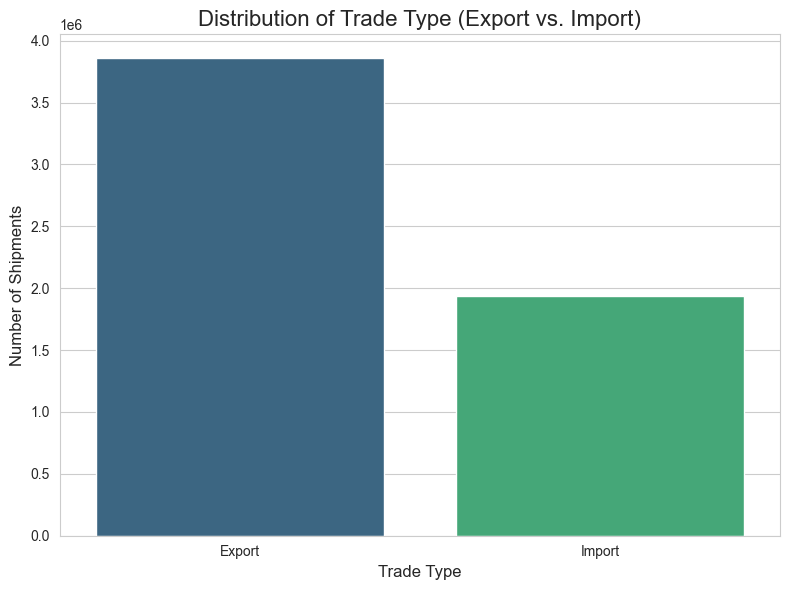

In [85]:
trade_type_counts = merged_data['TRADE_TYPE'].value_counts()
print(trade_type_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=trade_type_counts.index, y=trade_type_counts.values, palette='viridis')
plt.title('Distribution of Trade Type (Export vs. Import)', fontsize=16)
plt.xlabel('Trade Type', fontsize=12)
plt.ylabel('Number of Shipments', fontsize=12)
plt.tight_layout()
plt.show()

> The data shows a significantly higher number of Export shipments compared to Import shipments. Exports account for roughly double the volume of imports in this dataset. This suggests that the transborder freight activity captured here is predominantly outbound from the U.S.

#### 2. Distribution of MODE_OF_TRANSPORTATION

Truck                         3783850
Air                           1000596
Rail                           591267
Other                          206485
Vessel                         174334
Foreign Trade Zones (FTZs)      21798
Pipeline                        11619
Mail (U.S. Postal Service)       6848
Name: MODE_OF_TRANSPORTATION, dtype: int64


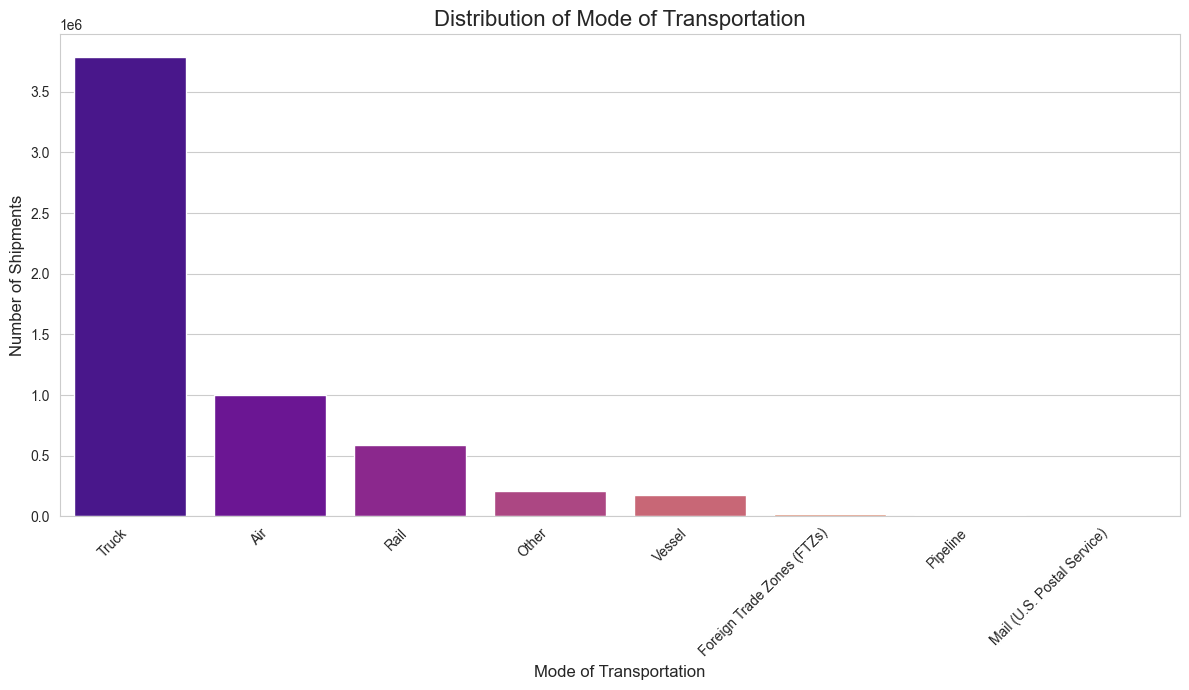

In [84]:
mode_counts = merged_data['MODE_OF_TRANSPORTATION'].value_counts()
print(mode_counts)

plt.figure(figsize=(12, 7))
sns.barplot(x=mode_counts.index, y=mode_counts.values, palette='plasma')
plt.title('Distribution of Mode of Transportation', fontsize=16)
plt.xlabel('Mode of Transportation', fontsize=12)
plt.ylabel('Number of Shipments', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

> **Dominance of Trucking:** Truck transportation is by far the most prevalent mode, accounting for the vast majority of shipments. This is typical for cross-border freight, especially with neighboring countries like Canada and Mexico, due to flexibility, door-to-door service, and extensive road networks.

> **Significant Air and Rail Activity:** Air and Rail modes follow, indicating their importance for faster transit (Air) or bulk goods over longer distances (Rail).

> **Less Frequent Modes:** Vessel, Pipeline, and Mail shipments occur much less frequently in terms of transaction count, likely due to their specialized nature or slower transit times.

> **The "Other" Category:** The "Other" category is quite substantial (over 200,000 shipments). It would be beneficial to investigate what modes fall under "Other" to gain a more complete picture, though the documentation defines it simply as "Other."

#### 3. Distribution of COUNTRY_NAME

Canada    3503837
Mexico    2292960
Name: COUNTRY_NAME, dtype: int64


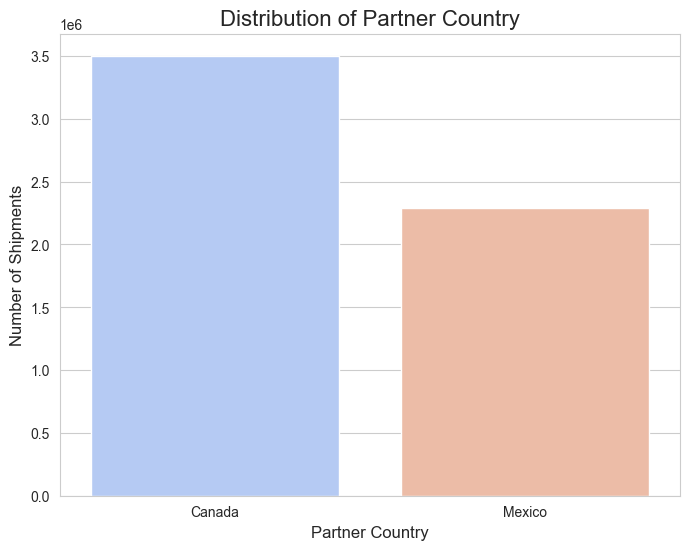

In [86]:
country_counts = merged_data['COUNTRY_NAME'].value_counts()
print(country_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='coolwarm')
plt.title('Distribution of Partner Country', fontsize=16)
plt.xlabel('Partner Country', fontsize=12)
plt.ylabel('Number of Shipments', fontsize=12)
plt.show()

> Freight movement with Canada is more frequent than with Mexico.

#### 4. Distribution of DOMESTIC_FOREIGN_STATUS 

Domestically Produced    2572119
Unknown/Not Specified    1938585
Foreign Produced         1286093
Name: DOMESTIC_FOREIGN_STATUS, dtype: int64


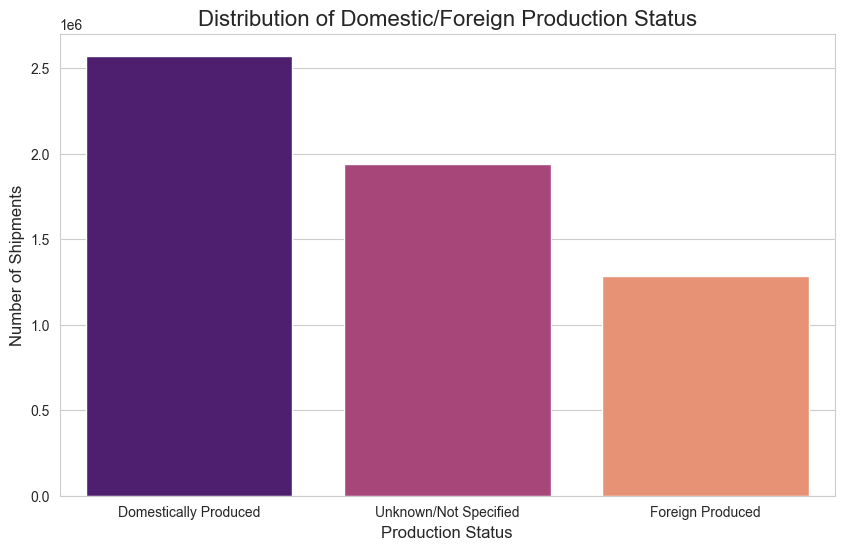

In [87]:
df_status_counts = merged_data['DOMESTIC_FOREIGN_STATUS'].value_counts()
print(df_status_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=df_status_counts.index, y=df_status_counts.values, palette='magma')
plt.title('Distribution of Domestic/Foreign Production Status', fontsize=16)
plt.xlabel('Production Status', fontsize=12)
plt.ylabel('Number of Shipments', fontsize=12)
plt.show()

 > - A significant portion of the freight is Domestically Produced, indicating a strong internal component to transborder movements (e.g., U.S. goods moving to the border for export).

> - The "Unknown/Not Specified" category is quite large, almost as large as the "Domestically Produced" category. This highlights a data gap where the origin of the merchandise (domestic or foreign) is not recorded. This category likely corresponds to the 0 values we filled in for the DF column. For future analysis, if the origin is critical, this "Unknown" category might need further investigation or careful consideration when interpreting results.

> - Foreign Produced merchandise accounts for the smallest segment among the known categories.

#### 5. Total Value and Weight by Trade Type

In [88]:
trade_value_weight = merged_data.groupby('TRADE_TYPE')[['VALUE', 'SHIPWT']].sum().reset_index()
print(trade_value_weight)

  TRADE_TYPE           VALUE         SHIPWT
0     Export   9102357559105  1230753247134
1     Import  11896529541177  7184904077373


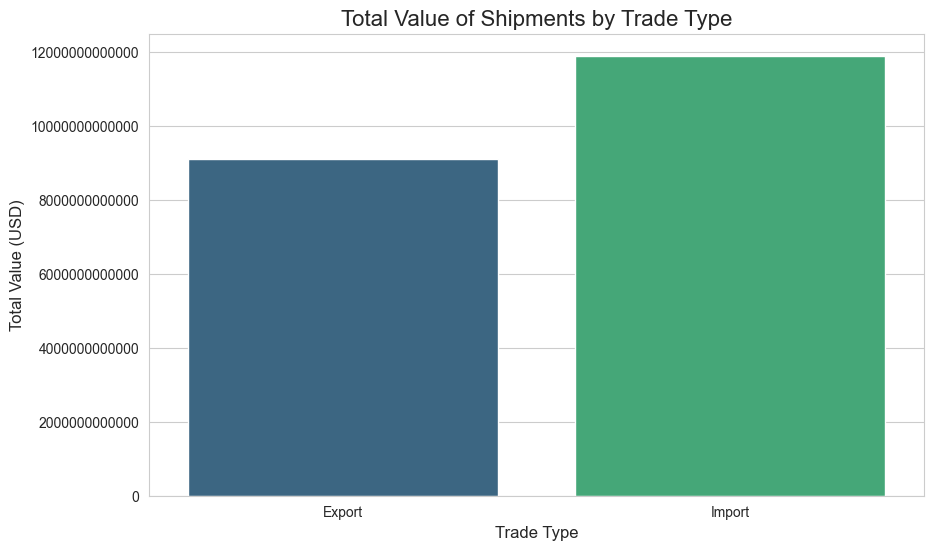

In [89]:
# Plotting Value by Trade Type

plt.figure(figsize=(10, 6))
sns.barplot(x='TRADE_TYPE', y='VALUE', data=trade_value_weight, palette='viridis')
plt.title('Total Value of Shipments by Trade Type', fontsize=16)
plt.xlabel('Trade Type', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


> While the number of export shipments was higher, the total value of Import shipments is significantly greater than Export shipments. This suggests that imported goods, though fewer in count, are generally of higher individual value than exported goods.

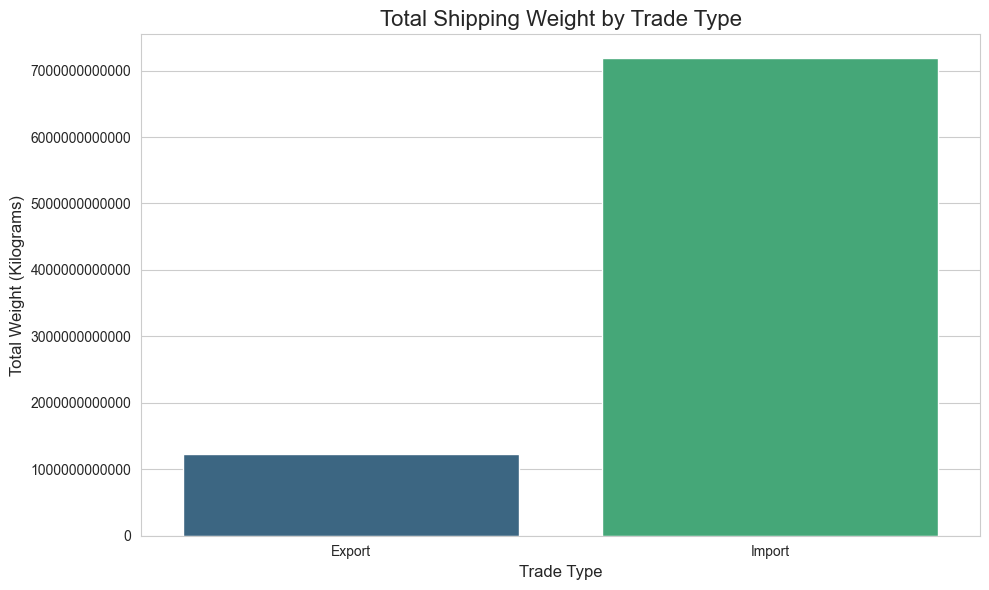

In [90]:
# Plotting Weight by Trade Type

plt.figure(figsize=(10, 6))
sns.barplot(x='TRADE_TYPE', y='SHIPWT', data=trade_value_weight, palette='viridis')
plt.title('Total Shipping Weight by Trade Type', fontsize=16)
plt.xlabel('Trade Type', fontsize=12)
plt.ylabel('Total Weight (Kilograms)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y') # Prevent scientific notation
plt.tight_layout()
plt.show()

> Similar to value, the total weight of Import shipments is substantially higher than Export shipments. This indicates that imports not only carry higher value but also significantly more physical volume. This could imply imports of raw materials, bulk commodities, or heavier manufactured goods.

#### 6. Total Value and Weight by Mode of Transportation

In [91]:
mode_value_weight = merged_data.groupby('MODE_OF_TRANSPORTATION')[['VALUE', 'SHIPWT']].sum().reset_index()

mode_value_weight = mode_value_weight.sort_values(by='VALUE', ascending=False)
print(mode_value_weight)

       MODE_OF_TRANSPORTATION           VALUE         SHIPWT
6                       Truck  13108972520435  1679337751709
5                        Rail   2824608289004  1337677679763
7                      Vessel   1689806299639  2765258214734
4                    Pipeline   1661472980484  2558458849154
3                       Other    814624563207     3439826330
0                         Air    785603897000     4831066153
1  Foreign Trade Zones (FTZs)    113409380801    66653896839
2  Mail (U.S. Postal Service)       389169712          39825


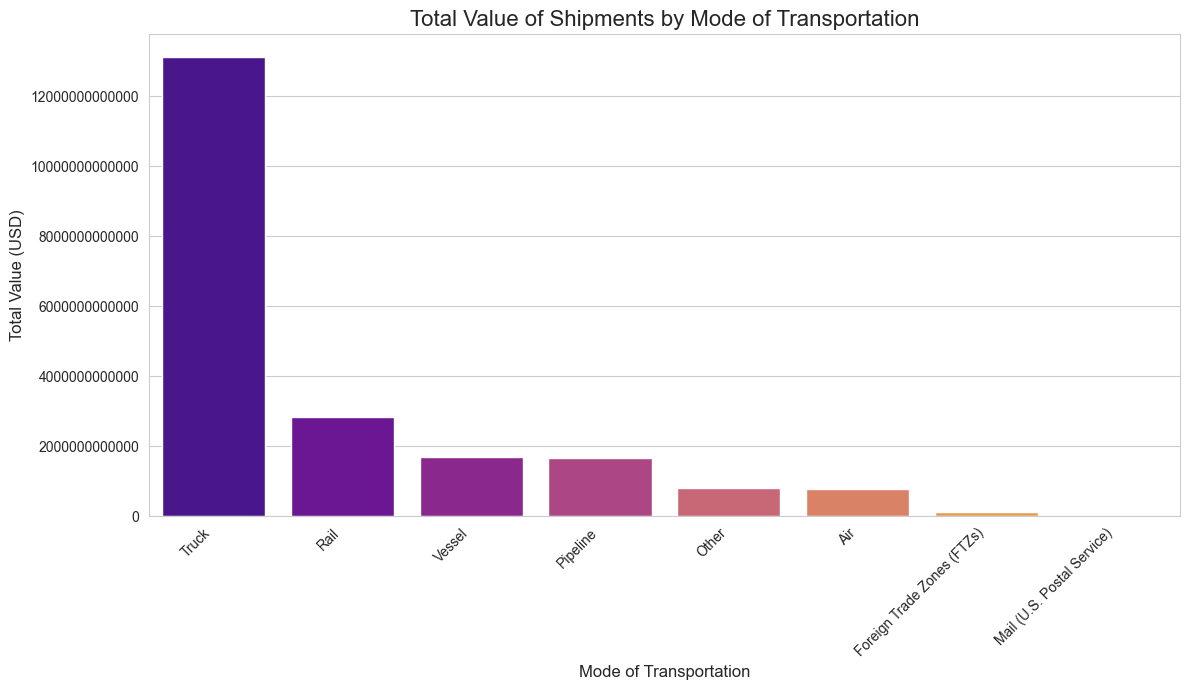

In [92]:
# Plotting Value by Mode of Transportation

plt.figure(figsize=(12, 7))
sns.barplot(x='MODE_OF_TRANSPORTATION', y='VALUE', data=mode_value_weight, palette='plasma')
plt.title('Total Value of Shipments by Mode of Transportation', fontsize=16)
plt.xlabel('Mode of Transportation', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


> Trucking dominates in terms of total value, reinforcing its role as the primary conduit for high-value goods in transborder trade. Rail, Vessel, and Pipeline follow, indicating their importance for moving substantial economic value. Interestingly, Air, despite its speed and often higher cost per unit, carries less total value than Truck, Rail, Vessel, and Pipeline, suggesting it's used for specific, perhaps lighter, high-value goods.

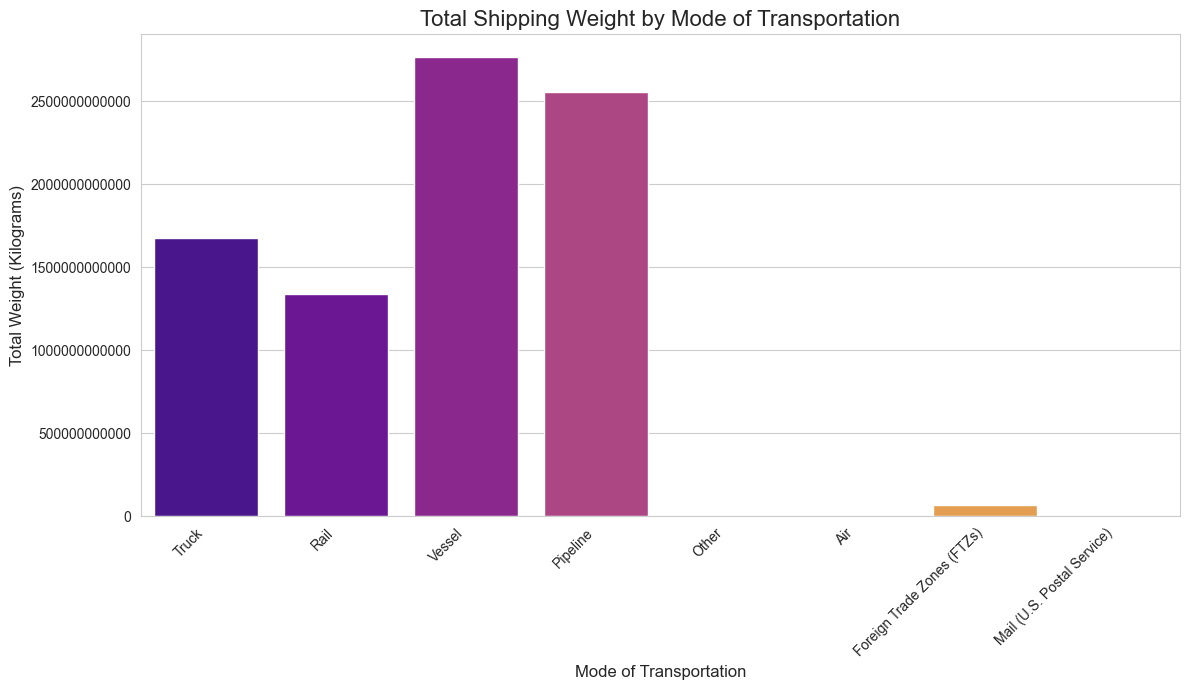

In [94]:
# Plotting Weight by Mode of Transportation

plt.figure(figsize=(12, 7))
sns.barplot(x='MODE_OF_TRANSPORTATION', y='SHIPWT', data=mode_value_weight, palette='plasma')
plt.title('Total Shipping Weight by Mode of Transportation', fontsize=16)
plt.xlabel('Mode of Transportation', fontsize=12)
plt.ylabel('Total Weight (Kilograms)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

> In terms of total weight, Vessel and Pipeline transportation are the leaders, surpassing even trucking. This is logical, as these modes are typically used for bulk commodities (e.g., oil, gas, grains, minerals) where weight is a primary factor and speed is less critical. Truck and Rail still carry substantial weight, but their share is proportionally smaller when considering total physical volume compared to their share of shipment count or value. Air and Mail carry very little weight, as expected.

#### 7. Total VALUE and SHIPWT by COUNTRY_NAME and MODE_OF_TRANSPORTATION

In [95]:
country_mode_value_weight = merged_data.groupby(['COUNTRY_NAME', 'MODE_OF_TRANSPORTATION'])[['VALUE', 'SHIPWT']].sum().reset_index()

country_mode_value_weight_sorted_value = country_mode_value_weight.sort_values(by='VALUE', ascending=False)
print("Sorted by Value:\n", country_mode_value_weight_sorted_value)


country_mode_value_weight_sorted_weight = country_mode_value_weight.sort_values(by='SHIPWT', ascending=False)
print("\nSorted by Weight:\n", country_mode_value_weight_sorted_weight)

Sorted by Value:
    COUNTRY_NAME      MODE_OF_TRANSPORTATION          VALUE         SHIPWT
14       Mexico                       Truck  7395097881976   849914379205
6        Canada                       Truck  5713874638459   829423372504
5        Canada                        Rail  1554711168116  1100132933771
4        Canada                    Pipeline  1510732452122  2554536855665
13       Mexico                        Rail  1269897120888   237544745992
15       Mexico                      Vessel  1177395840743  1563275099086
3        Canada                       Other   600016632958      476259978
7        Canada                      Vessel   512410458896  1201983115648
0        Canada                         Air   509206105479     3090098122
8        Mexico                         Air   276397791521     1740968031
11       Mexico                       Other   214607930249     2963566352
12       Mexico                    Pipeline   150740528362     3921993489
9        Mexico  For

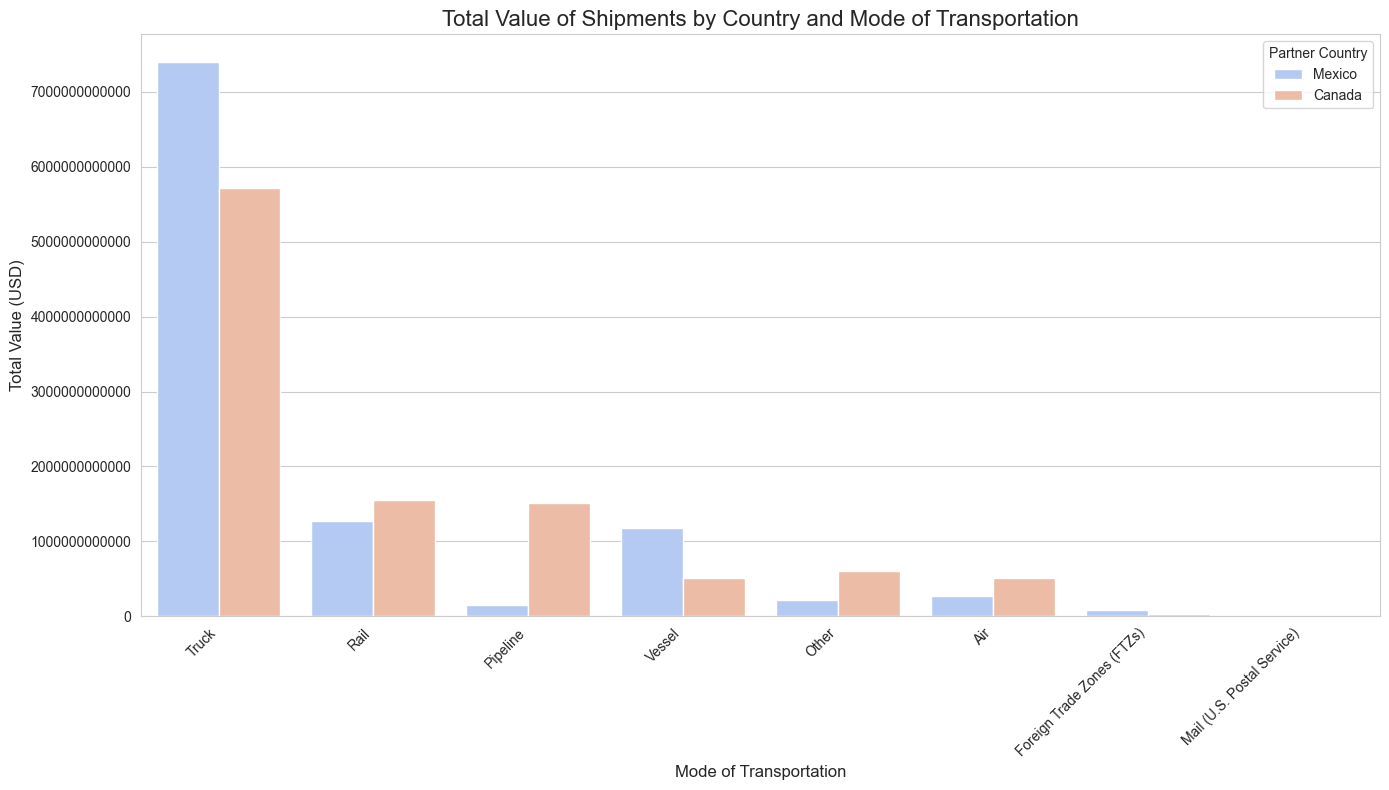

In [96]:
# Plotting Total Value by Country and Mode

plt.figure(figsize=(14, 8))
sns.barplot(x='MODE_OF_TRANSPORTATION', y='VALUE', hue='COUNTRY_NAME', data=country_mode_value_weight_sorted_value, palette='coolwarm')
plt.title('Total Value of Shipments by Country and Mode of Transportation', fontsize=16)
plt.xlabel('Mode of Transportation', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Partner Country')
plt.tight_layout()
plt.show()

> - Truck has the highest value mode for both Canada and Mexico, reinforcing its overall dominance in transborder trade value. Mexico's truck trade value is notably higher than Canada's.
> - Rail is the second highest value mode for both countries.
> - Air freight, while lower in overall value compared to surface modes, still represents a substantial amount of high-value goods, with Canada having higher air trade value than Mexico.

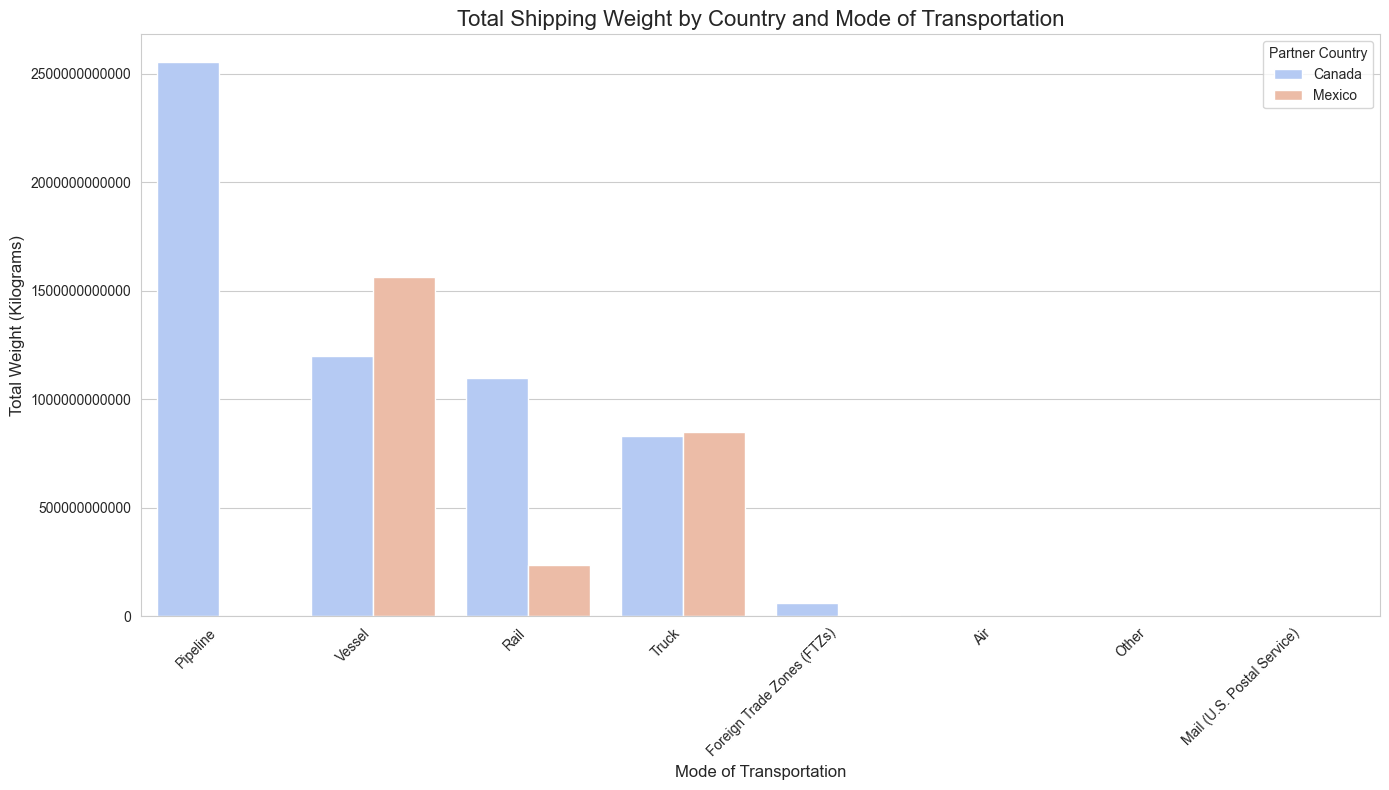

In [97]:
# Plotting Total Weight by Country and Mode

plt.figure(figsize=(14, 8))
sns.barplot(x='MODE_OF_TRANSPORTATION', y='SHIPWT', hue='COUNTRY_NAME', data=country_mode_value_weight_sorted_weight, palette='coolwarm')
plt.title('Total Shipping Weight by Country and Mode of Transportation', fontsize=16)
plt.xlabel('Mode of Transportation', fontsize=12)
plt.ylabel('Total Weight (Kilograms)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Partner Country')
plt.tight_layout()
plt.show()


> - Pipeline is the absolute leader in terms of weight for Canadian trade.
> - Vessel transportation carries immense weight for both countries, but particularly for Mexico, suggesting bulk goods moved via sea.
> - Truck and Rail remain crucial for physical volume, with Canada's rail weight being particularly high.
> - Air, Other, FTZs, and Mail carry significantly less weight, as expected.

#### Identifying trends in volume, routing, and modes of transportation used across regions and time periods.

#### 8. Monthly Trends in Value and Weight

In [115]:
monthly_trends = merged_data.set_index('DATE').resample('M')[['VALUE', 'SHIPWT']].sum().reset_index()

In [116]:
print(monthly_trends.head())
print(monthly_trends.tail())



        DATE         VALUE        SHIPWT
0 2020-01-31  291276945564  149028676461
1 2020-02-29  287847874539  135976310835
2 2020-03-31  296430766260  149006282061
3 2020-04-30  174368922804  131856951612
4 2020-05-31  168206828112  119874073998
         DATE         VALUE        SHIPWT
50 2024-03-31  267080666964   96237693800
51 2024-04-30  413986793517  148588778715
52 2024-05-31  416771071572  151901788632
53 2024-06-30  402687087882  147674315547
54 2024-07-31  402467618505  150259771974


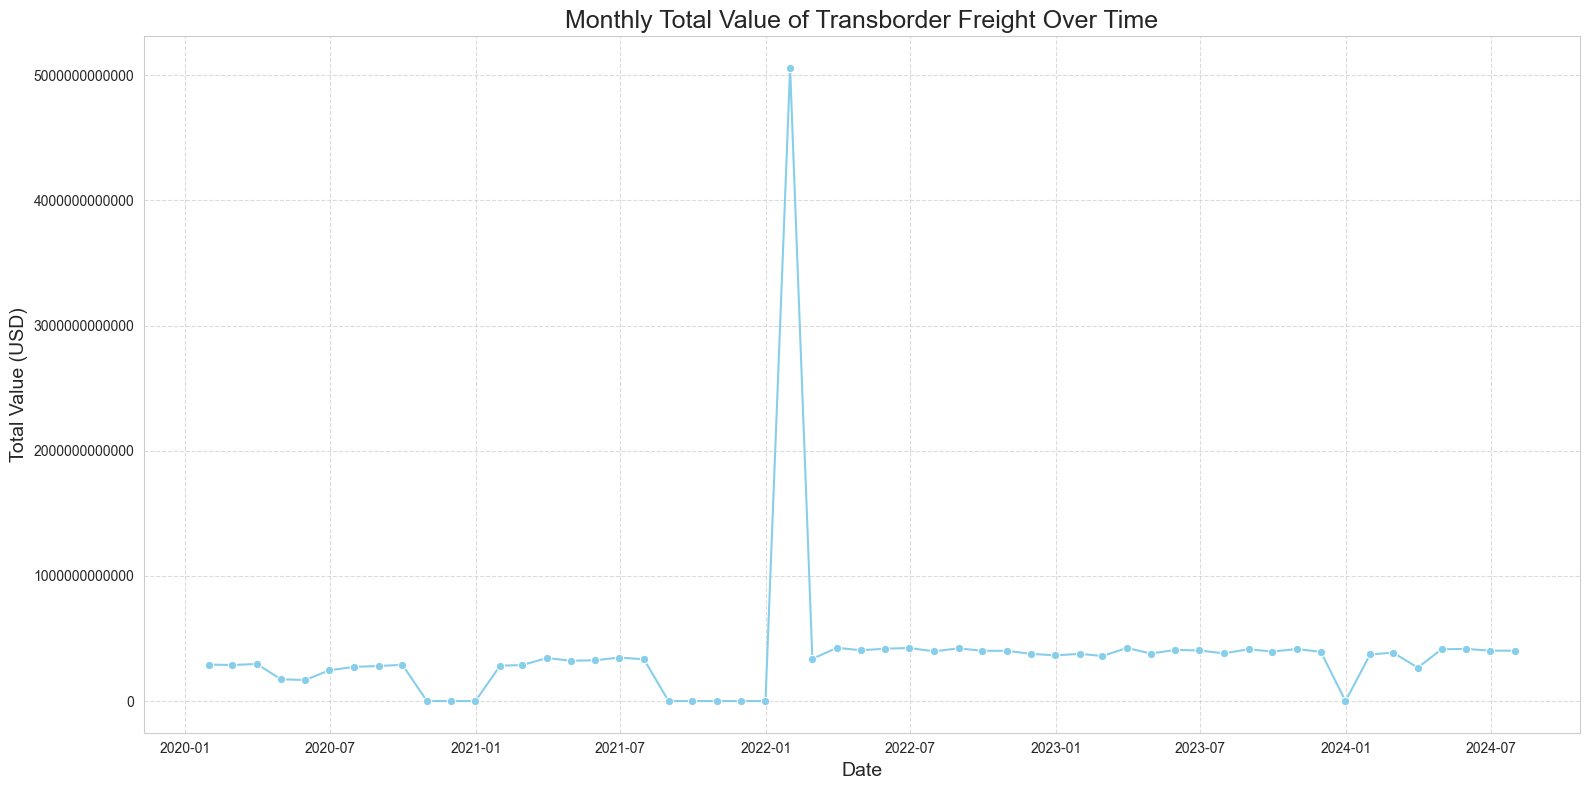

In [117]:
# Plotting Monthly Total Value

plt.figure(figsize=(16, 8))
sns.lineplot(x='DATE', y='VALUE', data=monthly_trends, marker='o', color='skyblue')
plt.title('Monthly Total Value of Transborder Freight Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Value (USD)', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

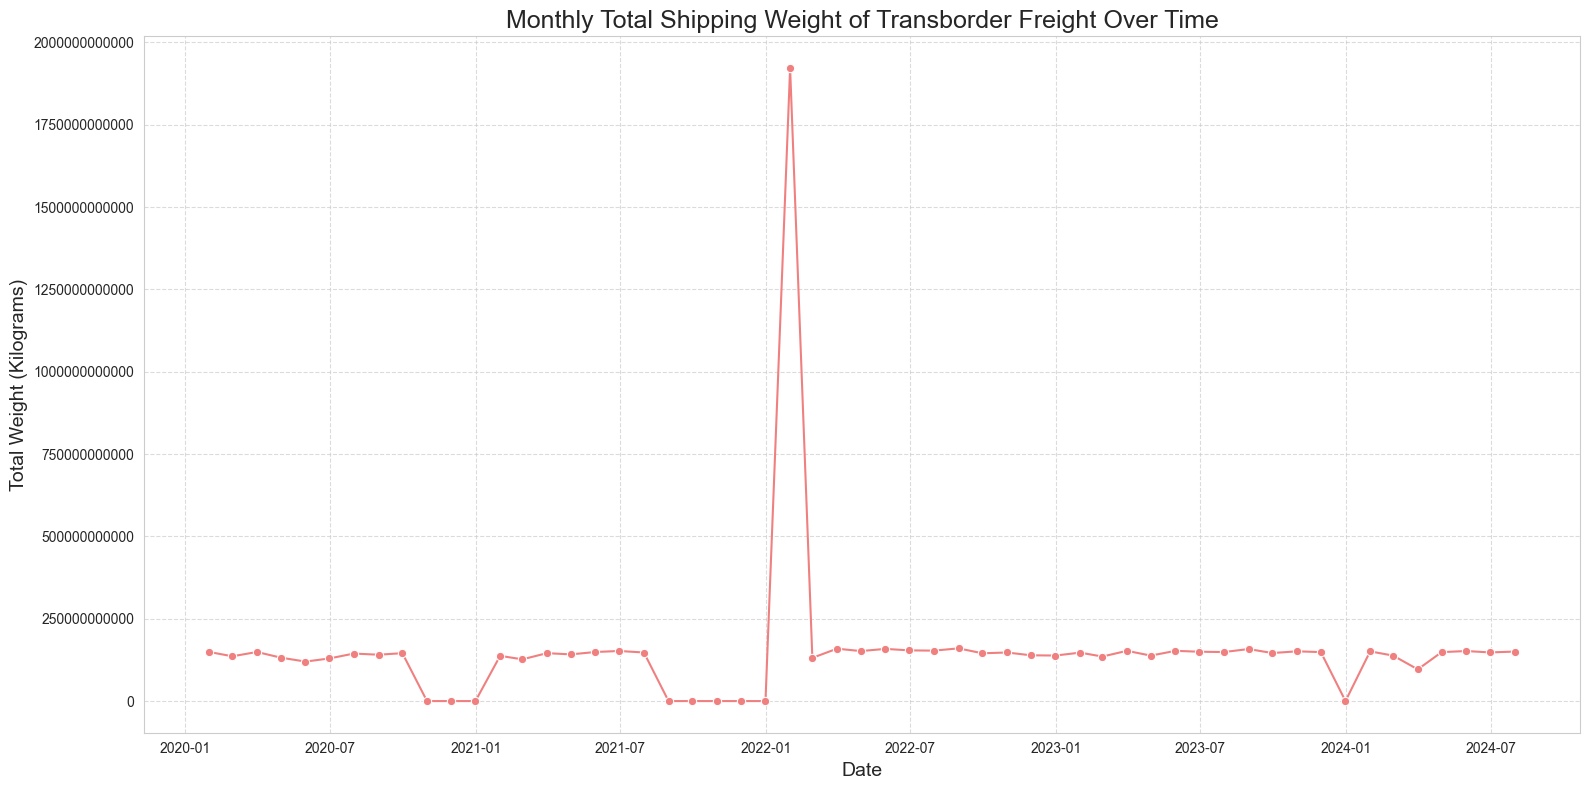

In [118]:
# Plotting Monthly Total Shipping Weight

plt.figure(figsize=(16, 8))
sns.lineplot(x='DATE', y='SHIPWT', data=monthly_trends, marker='o', color='lightcoral')
plt.title('Monthly Total Shipping Weight of Transborder Freight Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Weight (Kilograms)', fontsize=14)
plt.ticklabel_format(style='plain', axis='y') # Prevent scientific notation
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> - There's a noticeable drop in both value and weight from March to April/May 2020. This strongly correlates with the initial impact of the COVID-19 pandemic and associated lockdowns, which significantly disrupted global supply chains and trade.
> -  After the initial dip, both value and weight appear to recover and show a general upward trend through 2021, 2022, and 2023, reaching higher levels than pre-pandemic. This indicates a strong rebound in transborder freight activity.
> - The data for 2024 (april to July) shows continued high levels of freight value and weight, suggesting sustained economic activity.
> - February 2022 experience extremely high levels of shipping in both value and weight. 

In [119]:
monthly_mode_trends = merged_data.groupby(['MONTH', 'MODE_OF_TRANSPORTATION'])[['VALUE', 'SHIPWT']].mean().reset_index()

print("--- Average Monthly Value by Mode (Sample) ---")
print(monthly_mode_trends.pivot_table(index='MONTH', columns='MODE_OF_TRANSPORTATION', values='VALUE').head())

print("\n--- Average Monthly Weight by Mode (Sample) ---")
print(monthly_mode_trends.pivot_table(index='MONTH', columns='MODE_OF_TRANSPORTATION', values='SHIPWT').head())



--- Average Monthly Value by Mode (Sample) ---
MODE_OF_TRANSPORTATION           Air  Foreign Trade Zones (FTZs)  \
MONTH                                                              
1                       1.580107e+06                9.839501e+06   
2                       5.934464e+05                4.288159e+06   
3                       6.551472e+05                4.136856e+06   
4                       6.322718e+05                4.208890e+06   
5                       6.308143e+05                3.858961e+06   

MODE_OF_TRANSPORTATION  Mail (U.S. Postal Service)         Other  \
MONTH                                                              
1                                    104901.669691  7.523193e+06   
2                                     48399.549650  3.236913e+06   
3                                     57701.909471  3.398691e+06   
4                                     43976.026912  3.049936e+06   
5                                     44992.908333  3.158550e+06   


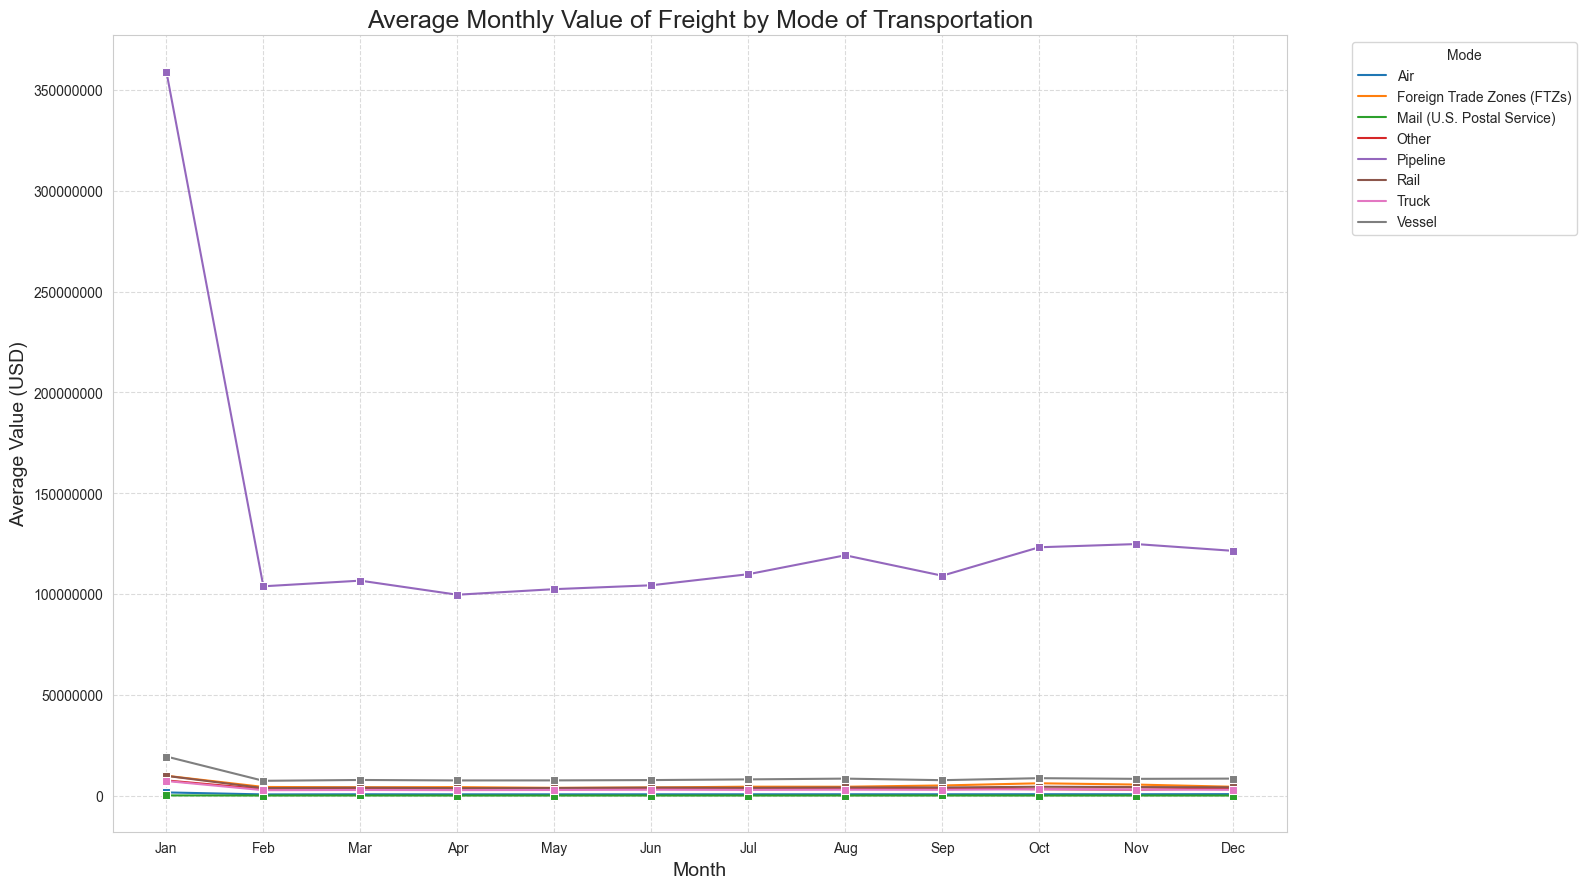

In [128]:
# Plotting Average Monthly Value by Mode

plt.figure(figsize=(16, 9))
sns.lineplot(x='MONTH', y='VALUE', hue='MODE_OF_TRANSPORTATION', data=monthly_mode_trends, marker='s', palette='tab10')
plt.title('Average Monthly Value of Freight by Mode of Transportation', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Value (USD)', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> - Pipeline mode shows significantly higher average values per shipment compared to other modes, especially in January.

> - Truck, Rail, Air: These modes also show substantial average values, but generally lower than Pipeline and Vessel. Their values fluctuate across months.

> - Truck, Rail, Vessel and "Other" modes appear to have relatively consistent average values across months, while others might show more fluctuation.

> - Mail and Foreign Trade Zones (FTZs) consistently have the lowest average values, which is expected given the nature of their operations.

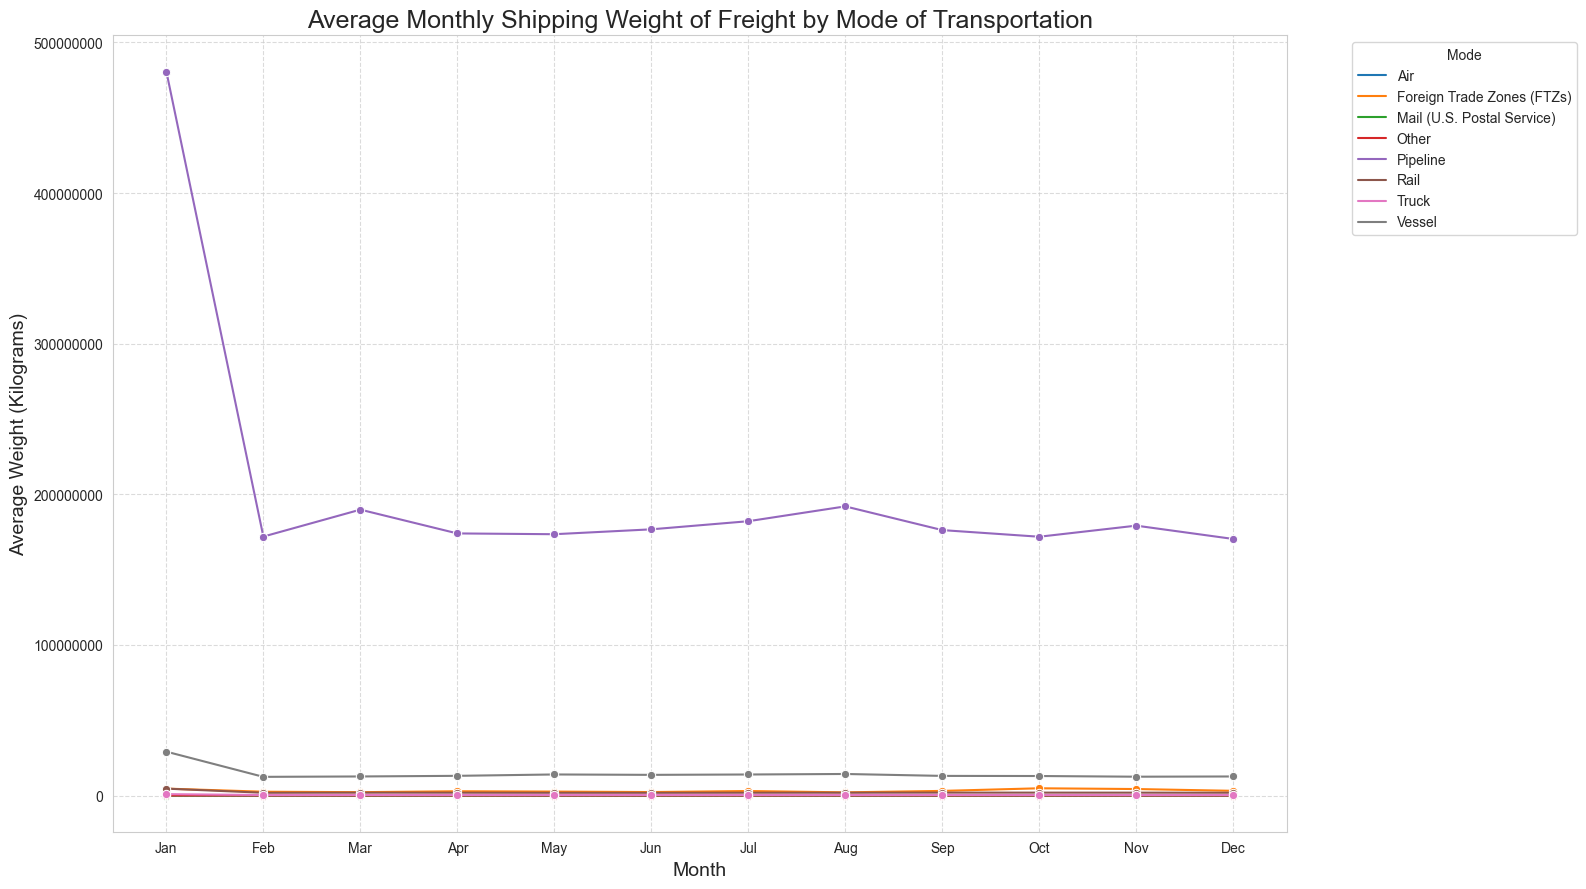

In [121]:
# Plotting Average Monthly Shipping Weight by Mode

plt.figure(figsize=(16, 9))
sns.lineplot(x='MONTH', y='SHIPWT', hue='MODE_OF_TRANSPORTATION', data=monthly_mode_trends, marker='o', palette='tab10')
plt.title('Average Monthly Shipping Weight of Freight by Mode of Transportation', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Weight (Kilograms)', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


> - Similar to value, Pipeline mode transport exceptionally high average weights per shipment. Pipeline's average weight in January is particularly massive. This confirms their role in moving bulk commodities.

> - Rail and FTZs modes carry substantial average weights, but significantly less than Pipeline and Vessel.

> - Air, "Other" and Truck have low average weights per shipment, reflecting their use for lighter, often higher-value goods or documents.

> - Mail mode has extremely low average weight per shipment, reflecting it's use for super lighter, goods like documents.


#### 9.  Identifying operational inefficiencies

We'll calculate the average freight charge per dollar of value and average freight charge per kilogram of weight. This will help us compare the cost efficiency across different modes or trade types.

In [129]:
# avoiding didvion by zero

merged_data['FREIGHT_CHARGE_PER_VALUE'] = merged_data.apply(
    lambda row: row['FREIGHT_CHARGES'] / row['VALUE'] if row['VALUE'] > 0 else 0, axis=1
)
merged_data['FREIGHT_CHARGE_PER_SHIPWT'] = merged_data.apply(
    lambda row: row['FREIGHT_CHARGES'] / row['SHIPWT'] if row['SHIPWT'] > 0 else 0, axis=1
)

In [130]:
print("--- Sample of Merged Data with new Freight Charge Ratios ---")
print(merged_data[['VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'FREIGHT_CHARGE_PER_VALUE', 'FREIGHT_CHARGE_PER_SHIPWT']].head())


--- Sample of Merged Data with new Freight Charge Ratios ---
     VALUE    SHIPWT  FREIGHT_CHARGES  FREIGHT_CHARGE_PER_VALUE  \
0     4660         0               67                  0.014378   
1    14360         0              282                  0.019638   
2  4293733  24971000                0                  0.000000   
3    28283       443              563                  0.019906   
4    29848        69              538                  0.018025   

   FREIGHT_CHARGE_PER_SHIPWT  
0                   0.000000  
1                   0.000000  
2                   0.000000  
3                   1.270880  
4                   7.797101  


In [131]:
# --- Average Freight Charge Ratios by MODE_OF_TRANSPORTATION ---

print("\n--- Average Freight Charge Ratios by Mode of Transportation ---")
avg_charge_by_mode = merged_data.groupby('MODE_OF_TRANSPORTATION')[['FREIGHT_CHARGE_PER_VALUE', 'FREIGHT_CHARGE_PER_SHIPWT']].mean().reset_index()

avg_charge_by_mode_sorted_value = avg_charge_by_mode.sort_values(by='FREIGHT_CHARGE_PER_VALUE', ascending=False)
print("Sorted by Average Charge Per Value:\n", avg_charge_by_mode_sorted_value)

avg_charge_by_mode_sorted_weight = avg_charge_by_mode.sort_values(by='FREIGHT_CHARGE_PER_SHIPWT', ascending=False)
print("\nSorted by Average Charge Per Weight:\n", avg_charge_by_mode_sorted_weight)


--- Average Freight Charge Ratios by Mode of Transportation ---
Sorted by Average Charge Per Value:
        MODE_OF_TRANSPORTATION  FREIGHT_CHARGE_PER_VALUE  \
4                    Pipeline                  0.046467   
7                      Vessel                  0.045042   
0                         Air                  0.031593   
1  Foreign Trade Zones (FTZs)                  0.026671   
5                        Rail                  0.025190   
2  Mail (U.S. Postal Service)                  0.023614   
6                       Truck                  0.016317   
3                       Other                  0.015372   

   FREIGHT_CHARGE_PER_SHIPWT  
4                   0.094758  
7                   1.331384  
0                  16.170569  
1                   3.122951  
5                   0.045386  
2                   7.374803  
6                   0.346269  
3                 107.710418  

Sorted by Average Charge Per Weight:
        MODE_OF_TRANSPORTATION  FREIGHT_CHARGE_PE

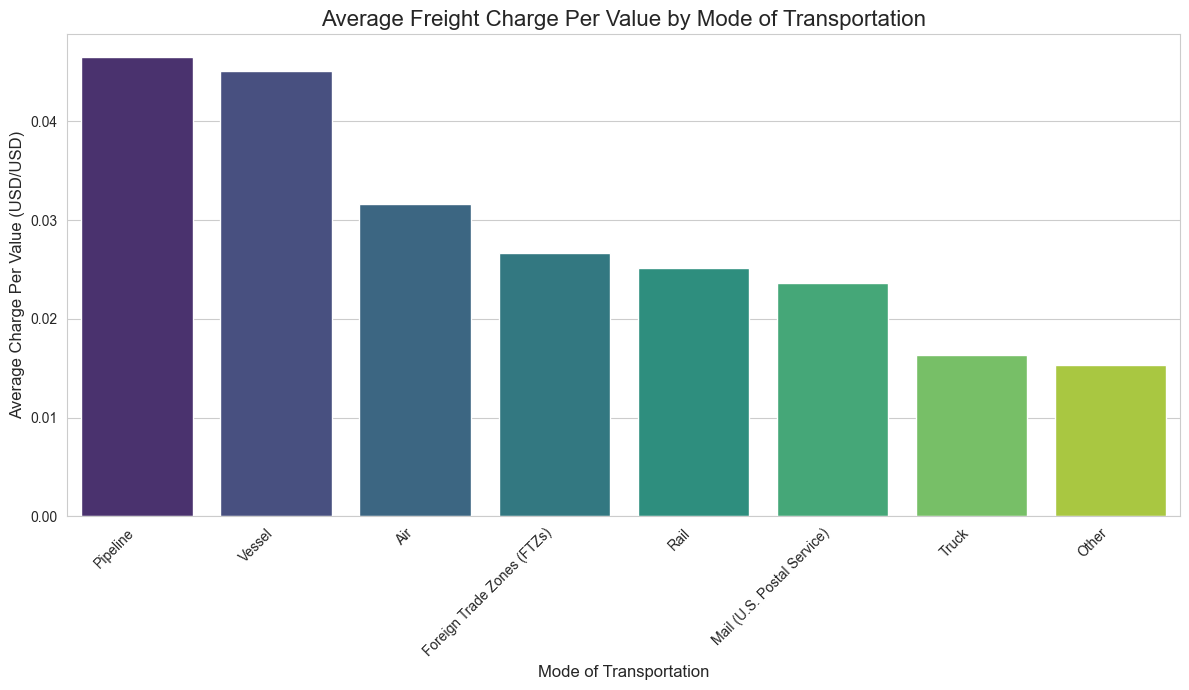

In [132]:
# Plotting Average Freight Charge Per Value by Mode

plt.figure(figsize=(12, 7))
sns.barplot(x='MODE_OF_TRANSPORTATION', y='FREIGHT_CHARGE_PER_VALUE', data=avg_charge_by_mode_sorted_value, palette='viridis')
plt.title('Average Freight Charge Per Value by Mode of Transportation', fontsize=16)
plt.xlabel('Mode of Transportation', fontsize=12)
plt.ylabel('Average Charge Per Value (USD/USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 - Pipeline and Vessel have the highest average freight charge per dollar of value.

- Truck and Other modes appear to be the most "cost-efficient" in terms of freight charge per dollar of value.

- Air is in the middle, which is quite surprising given its reputation for high cost.

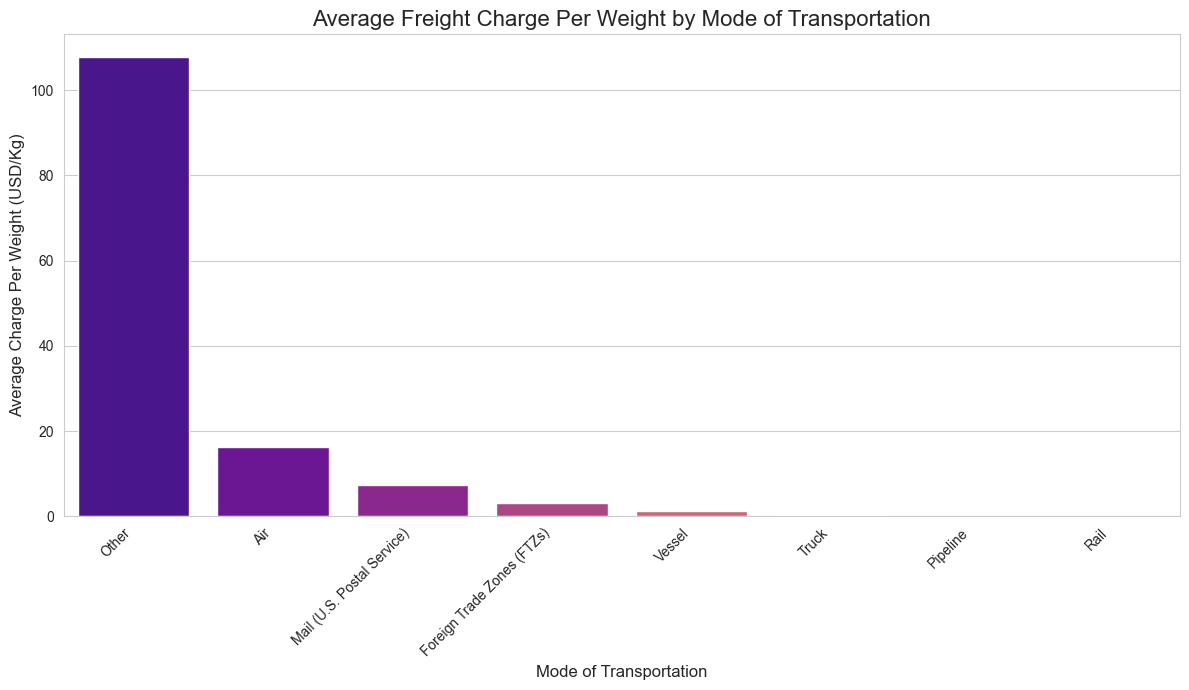

In [133]:
# Plotting Average Freight Charge Per Weight by Mode

plt.figure(figsize=(12, 7))
sns.barplot(x='MODE_OF_TRANSPORTATION', y='FREIGHT_CHARGE_PER_SHIPWT', data=avg_charge_by_mode_sorted_weight, palette='plasma')
plt.title('Average Freight Charge Per Weight by Mode of Transportation', fontsize=16)
plt.xlabel('Mode of Transportation', fontsize=12)
plt.ylabel('Average Charge Per Weight (USD/Kg)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 - This ranking is much more intuitive. "Other" mode has the highest average freight charge per kilogram. 
 
 - Air mode has a higher average freight charge per kilogram.

 - Mail also has a high per-weight cost.

- Pipeline and Rail are the most cost-efficient modes per kilogram.

- Truck and Vessel are in the middle, providing a balance of cost and capacity.

#### 10. Total Value and Weight by USASTATE

In [134]:
print("--- Total Value and Weight by USASTATE ---")

usastate_summary = merged_data.groupby('USASTATE')[['VALUE', 'SHIPWT']].sum().reset_index()
usastate_summary_sorted_value = usastate_summary.sort_values(by='VALUE', ascending=False).head(10)
usastate_summary_sorted_weight = usastate_summary.sort_values(by='SHIPWT', ascending=False).head(10)
print("Top 10 USA States by Value:\n", usastate_summary_sorted_value)
print("\nTop 10 USA States by Weight:\n", usastate_summary_sorted_weight)


--- Total Value and Weight by USASTATE ---
Top 10 USA States by Value:
    USASTATE          VALUE         SHIPWT
45  UNKNOWN  6910609129365  2773139878598
44       TX  3104227336458  1211068875396
23       MI  1348406653866   298743361888
4        CA  1245622829054   262584012820
15       IL  1025113681956  1018130804958
36       OH   517179782338   156417823464
9        DU   453618199048    10240353492
35       NY   436828928498   110791077904
39       PA   364983155740   114240920150
16       IN   348647216154    81367014054

Top 10 USA States by Weight:
    USASTATE          VALUE         SHIPWT
45  UNKNOWN  6910609129365  2773139878598
44       TX  3104227336458  1211068875396
15       IL  1025113681956  1018130804958
23       MI  1348406653866   298743361888
19       LA   192042433768   268080244010
24       MN   268225192930   263859485558
4        CA  1245622829054   262584012820
49       WA   319491499577   212291847853
37       OK   115185820344   159990266120
36       OH   5

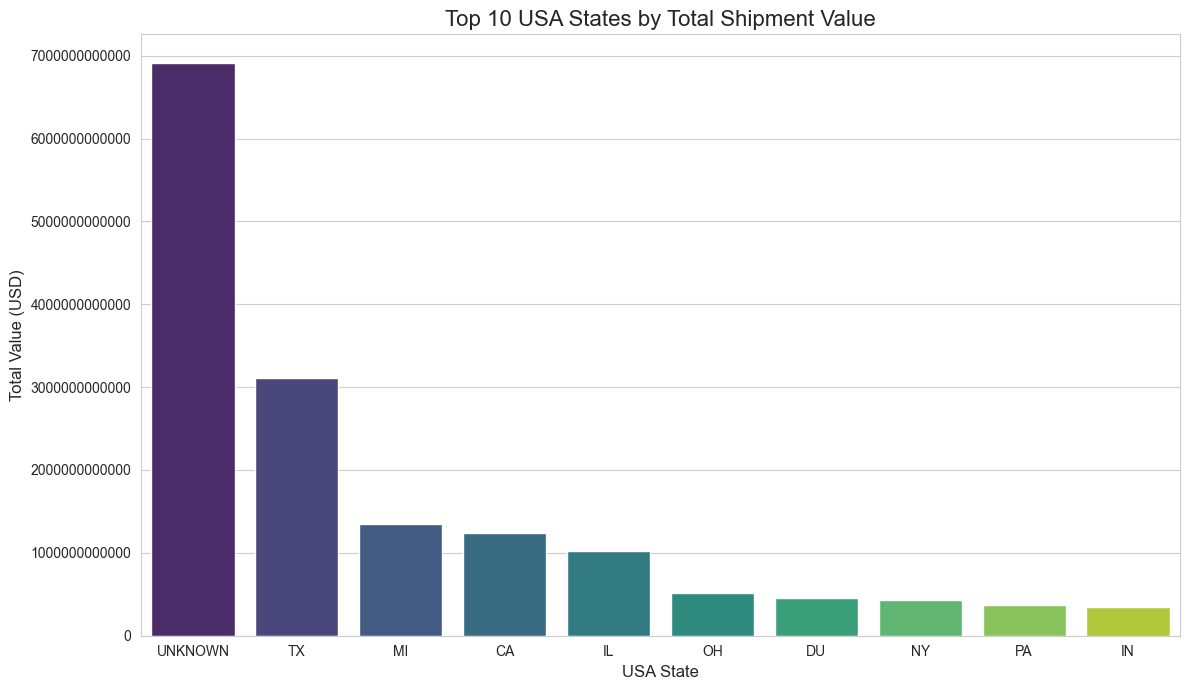

In [135]:
# Plotting Top 10 USA States by Value

plt.figure(figsize=(12, 7))
sns.barplot(x='USASTATE', y='VALUE', data=usastate_summary_sorted_value, palette='viridis')
plt.title('Top 10 USA States by Total Shipment Value', fontsize=16)
plt.xlabel('USA State', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

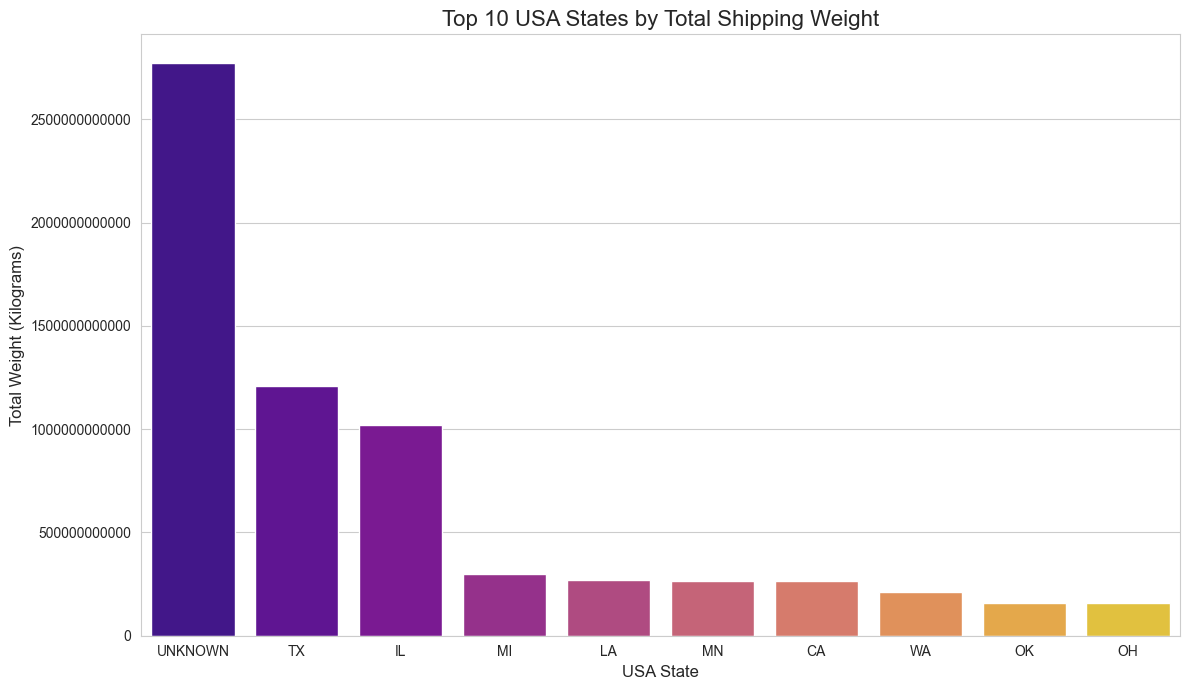

In [136]:
# Plotting Top 10 USA States by Weight

plt.figure(figsize=(12, 7))
sns.barplot(x='USASTATE', y='SHIPWT', data=usastate_summary_sorted_weight, palette='plasma')
plt.title('Top 10 USA States by Total Shipping Weight', fontsize=16)
plt.xlabel('USA State', fontsize=12)
plt.ylabel('Total Weight (Kilograms)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


> - In both value and weight, the "UNKNOWN" USASTATE category is the highest. This is a significant finding. It means a large portion of the freight data doesn't have an associated U.S. state. This could be due to the nature of the dot3 files (which don't have USASTATE as a direct column) or other data collection reasons. This "UNKNOWN" needs to be acknowledged as a major data limitation for state-level analysis.

> - Texas is consistently the top known U.S. state for both value and weight. This is expected given its long border with Mexico and its role as a major trade gateway.

> - Illinois shows high value and weight, likely due to its central location and robust rail/truck networks. Michigan is higher in value, probably driven by automotive trade with Canada.

> - Some states like California (CA) are high in value but relatively lower in weight (compared to TX or IL), suggesting high-value, lighter goods. Conversely, states like Ohio (OH) are higher in value than weight, indicating light weight, high value commodity movements.

> - "DU" (Unknown): Similar to the "UNKNOWN" categories, "DU" for USA states  indicates a portion of trade where the specific state is not recorded.

#### 11. Total Value and Weight by MEXSTATE

In [137]:
mexstate_summary = merged_data[~merged_data['MEXSTATE'].isin(['N/A', 'UNKNOWN'])].groupby('MEXSTATE')[['VALUE', 'SHIPWT']].sum().reset_index()
mexstate_summary_sorted_value = mexstate_summary.sort_values(by='VALUE', ascending=False).head(10)
mexstate_summary_sorted_weight = mexstate_summary.sort_values(by='SHIPWT', ascending=False).head(10)
print("\n--- Top 10 Mexican States by Value (excluding N/A, UNKNOWN) ---")
print(mexstate_summary_sorted_value)
print("\n--- Top 10 Mexican States by Weight (excluding N/A, UNKNOWN) ---")
print(mexstate_summary_sorted_weight)



--- Top 10 Mexican States by Value (excluding N/A, UNKNOWN) ---
   MEXSTATE         VALUE        SHIPWT
30       XX  461057493556  520861513688
3        CH  401393669520             0
16       MX  310098974544             0
17       NL  258027460112             0
1        BC  250896415394             0
8        DF  225265711806             0
19       OT  195744467684             0
28       TM  155260337984             0
6        CO  106742671932             0
13       JA   88296673988             0

--- Top 10 Mexican States by Weight (excluding N/A, UNKNOWN) ---
   MEXSTATE         VALUE        SHIPWT
30       XX  461057493556  520861513688
0        AG   36048779816             0
17       NL  258027460112             0
31       YU    3037796408             0
29       VE    6177941540             0
28       TM  155260337984             0
27       TL    3196500512             0
26       TB    2504276394             0
25       SO   87068310914             0
24       SL   46552914984    

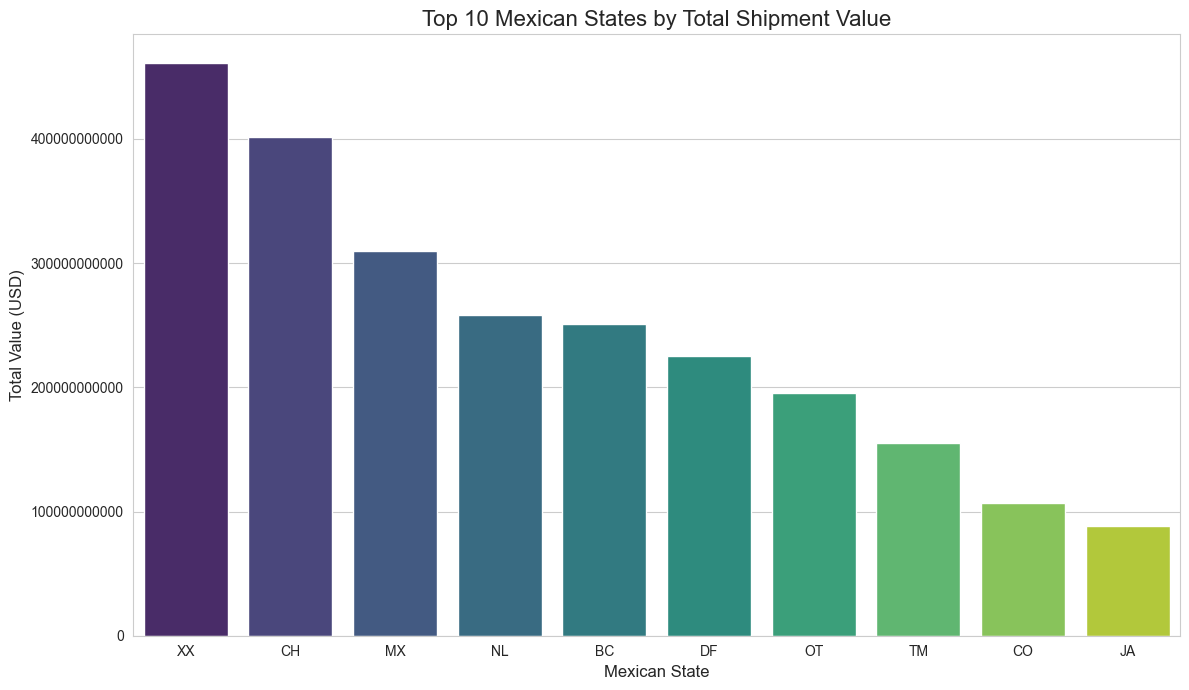

In [138]:
# Plotting Top 10 Mexican States by Value

plt.figure(figsize=(12, 7))
sns.barplot(x='MEXSTATE', y='VALUE', data=mexstate_summary_sorted_value, palette='viridis')
plt.title('Top 10 Mexican States by Total Shipment Value', fontsize=16)
plt.xlabel('Mexican State', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


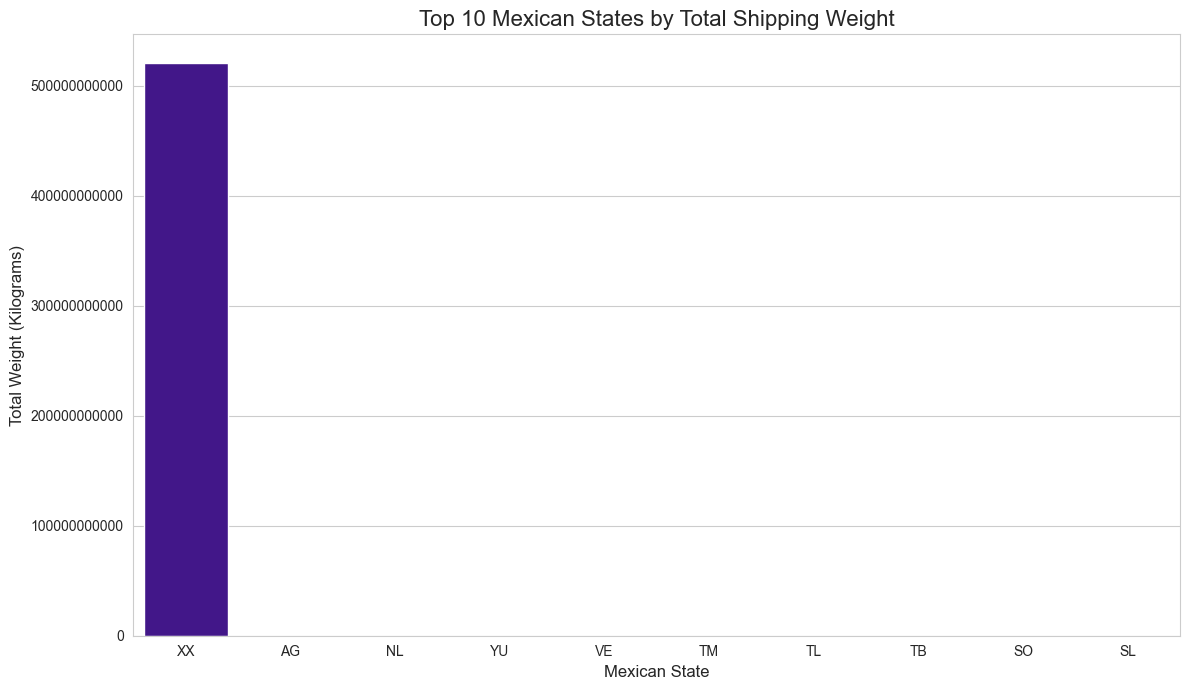

In [139]:
# Plotting Top 10 Mexican States by Weight

plt.figure(figsize=(12, 7))
sns.barplot(x='MEXSTATE', y='SHIPWT', data=mexstate_summary_sorted_weight, palette='plasma')
plt.title('Top 10 Mexican States by Total Shipping Weight', fontsize=16)
plt.xlabel('Mexican State', fontsize=12)
plt.ylabel('Total Weight (Kilograms)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

> - Similar to USASTATE, the "XX" code (which is unknown) is the top entry for both value and weight. This is another significant data limitation for granular Mexican state analysis.

> - Chihuahua (CH), Nuevo Leon (NL), Estado de Mexico (MX), Baja California (BC), Distrito Federal (DF), Tamaulipas (TM): These states appear frequently in the top 10 for value, indicating major industrial and commercial centers involved in trade with the U.S.

> - Value vs. Weight Discrepancies: For many Mexican states, SHIPWT is 0 in the top 10 by value. This is a data quality issue that suggests weight information is missing for a large number of high-value shipments from these states. This needs to be investigated further if weight-based analysis for Mexico is critical. The "XX" category, however, does show substantial weight.

> - "OT" (State Unknown): Similar to the "UNKNOWN" categories, "OT" for Mexican states  indicates a portion of trade where the specific state is not recorded.

#### 12. Total Value and Weight by CANPROV

In [147]:
canprov_summary = merged_data[~merged_data['CANPROV'].isin(['N/A', 'UNKNOWN'])].groupby('CANPROV')[['VALUE', 'SHIPWT']].sum().reset_index()
canprov_summary_sorted_value = canprov_summary.sort_values(by='VALUE', ascending=False).head(10)
canprov_summary_sorted_weight = canprov_summary.sort_values(by='SHIPWT', ascending=False).head(10)
print("\n--- Top 10 Canadian Provinces by Value (excluding N/A, UNKNOWN) ---")
print(canprov_summary_sorted_value)
print("\n--- Top 10 Canadian Provinces by Weight (excluding N/A, UNKNOWN) ---")
print(canprov_summary_sorted_weight)



--- Top 10 Canadian Provinces by Value (excluding N/A, UNKNOWN) ---
   CANPROV          VALUE         SHIPWT
6       XO  3360968339514   603954879218
1       XA  1323324824472  2031242366406
8       XQ   853588354300   383872078388
3       XC   442535242423   209732177489
4       XM   284854444376    75399559818
0       OT   258056730784       81709532
9       XS   201633688250   193232928988
2       XB   176874646560   209195213428
12      XW    48989128856    74361962872
5       XN    35125969198    69082679950

--- Top 10 Canadian Provinces by Weight (excluding N/A, UNKNOWN) ---
   CANPROV          VALUE         SHIPWT
1       XA  1323324824472  2031242366406
6       XO  3360968339514   603954879218
8       XQ   853588354300   383872078388
3       XC   442535242423   209732177489
2       XB   176874646560   209195213428
9       XS   201633688250   193232928988
4       XM   284854444376    75399559818
12      XW    48989128856    74361962872
5       XN    35125969198    69082679950


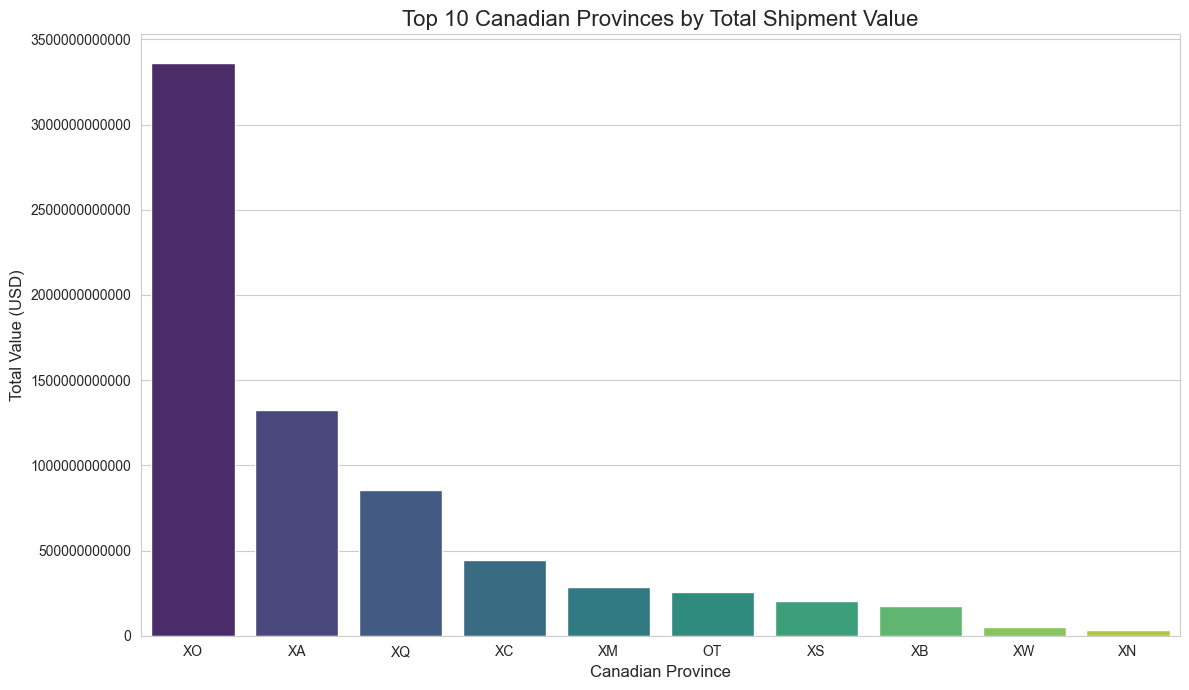

In [148]:
# Plotting Top 10 Canadian Provinces by Value

plt.figure(figsize=(12, 7))
sns.barplot(x='CANPROV', y='VALUE', data=canprov_summary_sorted_value, palette='viridis')
plt.title('Top 10 Canadian Provinces by Total Shipment Value', fontsize=16)
plt.xlabel('Canadian Province', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

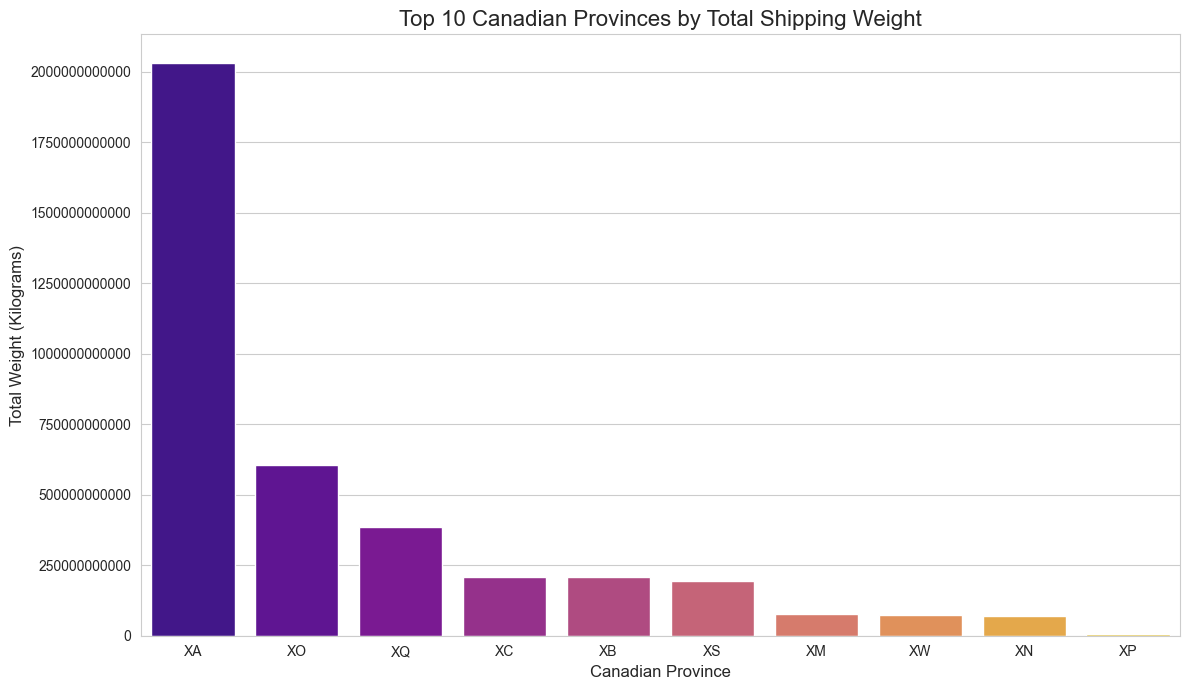

In [149]:
# Plotting Top 10 Canadian Provinces by Weight

plt.figure(figsize=(12, 7))
sns.barplot(x='CANPROV', y='SHIPWT', data=canprov_summary_sorted_weight, palette='plasma')
plt.title('Top 10 Canadian Provinces by Total Shipping Weight', fontsize=16)
plt.xlabel('Canadian Province', fontsize=12)
plt.ylabel('Total Weight (Kilograms)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

> - Ontario(XO) is by far the leading Canadian province in terms of total shipment value, reflecting its industrial heartland and extensive trade with the U.S.

> - Alberta (XA) dominates in total shipping weight, which is very likely driven by oil and gas exports (via pipeline and rail) to the U.S.

> - Quebec (XQ) and British Columbia (XC) are also significant provinces that show high value and weight, indicating their importance in trade.

> - "OT" (Province Unknown): Similar to the "UNKNOWN" and "XX" categories, "OT" for Canadian provinces indicates a portion of trade where the specific province is not recorded.

### Commodity Classification.

#### 13. Total VALUE and SHIPWT by COMMODITY_CODE

In [158]:
# Exclude 'UNKNOWN' for meaningful commodity analysis
commodity_summary = merged_data[merged_data['COMMODITY2'] != 'UNKNOWN'].groupby('COMMODITY2')[['VALUE', 'SHIPWT']].sum().reset_index()


commodity_summary['COMMODITY2'] = pd.to_numeric(commodity_summary['COMMODITY2'], errors='coerce')
commodity_summary.dropna(subset=['COMMODITY2'], inplace=True)
commodity_summary['COMMODITY2'] = commodity_summary['COMMODITY2'].astype(int)


commodity_summary_sorted_value = commodity_summary.sort_values(by='VALUE', ascending=False).head(15)
commodity_summary_sorted_weight = commodity_summary.sort_values(by='SHIPWT', ascending=False).head(15)

In [159]:
print("\n--- Top 15 Commodities by Value (excluding UNKNOWN) ---")
print(commodity_summary_sorted_value)

print("\n--- Top 15 Commodities by Weight (excluding UNKNOWN) ---")
print(commodity_summary_sorted_weight)



--- Top 15 Commodities by Value (excluding UNKNOWN) ---
    COMMODITY2          VALUE         SHIPWT
85          87  2187193174870   174612882539
26          27  2097303020812  3125411475032
82          84  1901328695327    68978475287
83          85  1529368040047    46517622945
38          39   550408182783    81550567084
96          98   442416458418    25599422195
88          90   400888677348     5435319478
72          73   250392931544    37864812429
92          94   233826148430    23600028626
70          71   229899605891      119233565
71          72   226330102135   143752320449
75          76   196154943425    38241420373
86          88   190929156535      225113276
43          44   181627217273   183404143608
47          48   171483692102    58150973358

--- Top 15 Commodities by Weight (excluding UNKNOWN) ---
    COMMODITY2          VALUE         SHIPWT
26          27  2097303020812  3125411475032
24          25    29215569285   430625576083
43          44   181627217273 

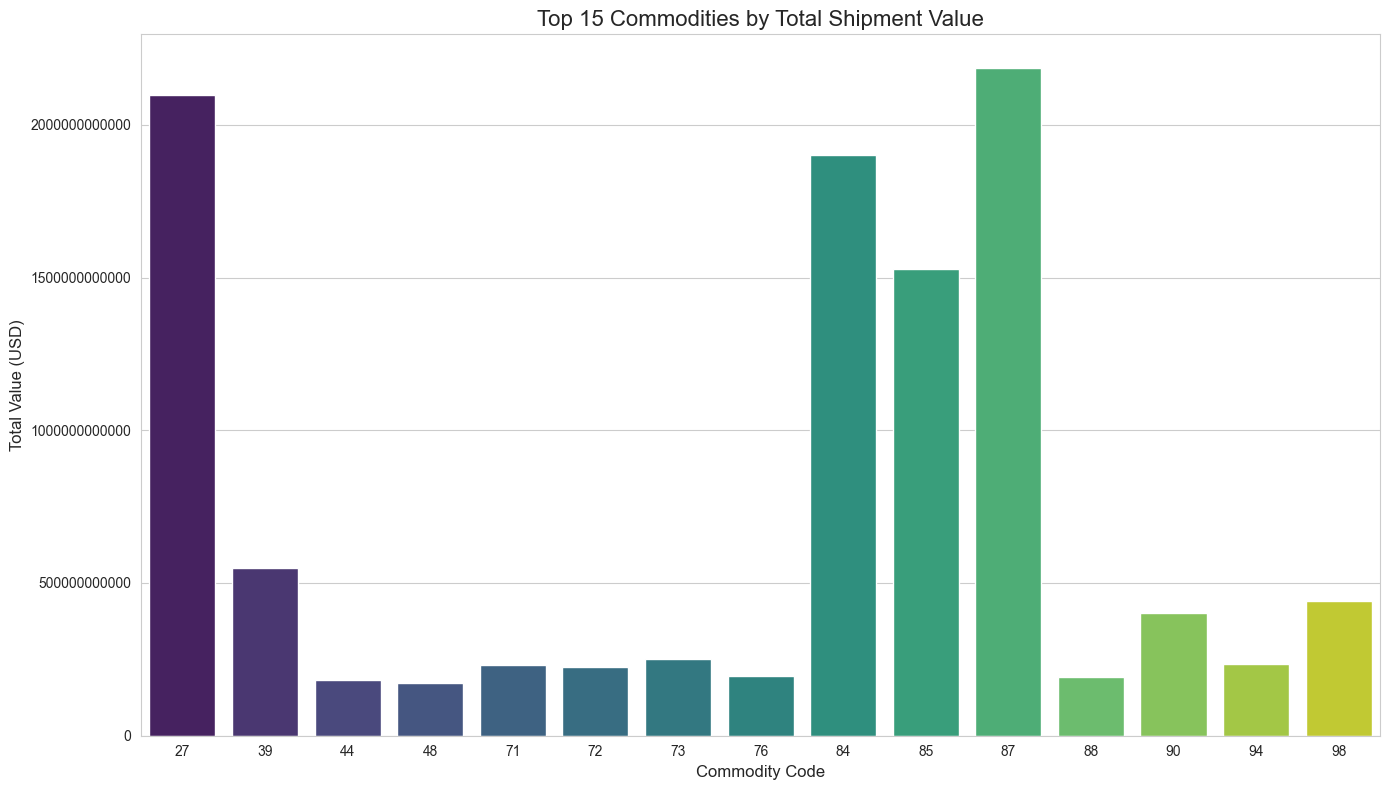

In [162]:
# Plotting Top 15 Commodities by Value

plt.figure(figsize=(14, 8))
sns.barplot(x='COMMODITY2', y='VALUE', data=commodity_summary_sorted_value, palette='viridis')
plt.title('Top 15 Commodities by Total Shipment Value', fontsize=16)
plt.xlabel('Commodity Code', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

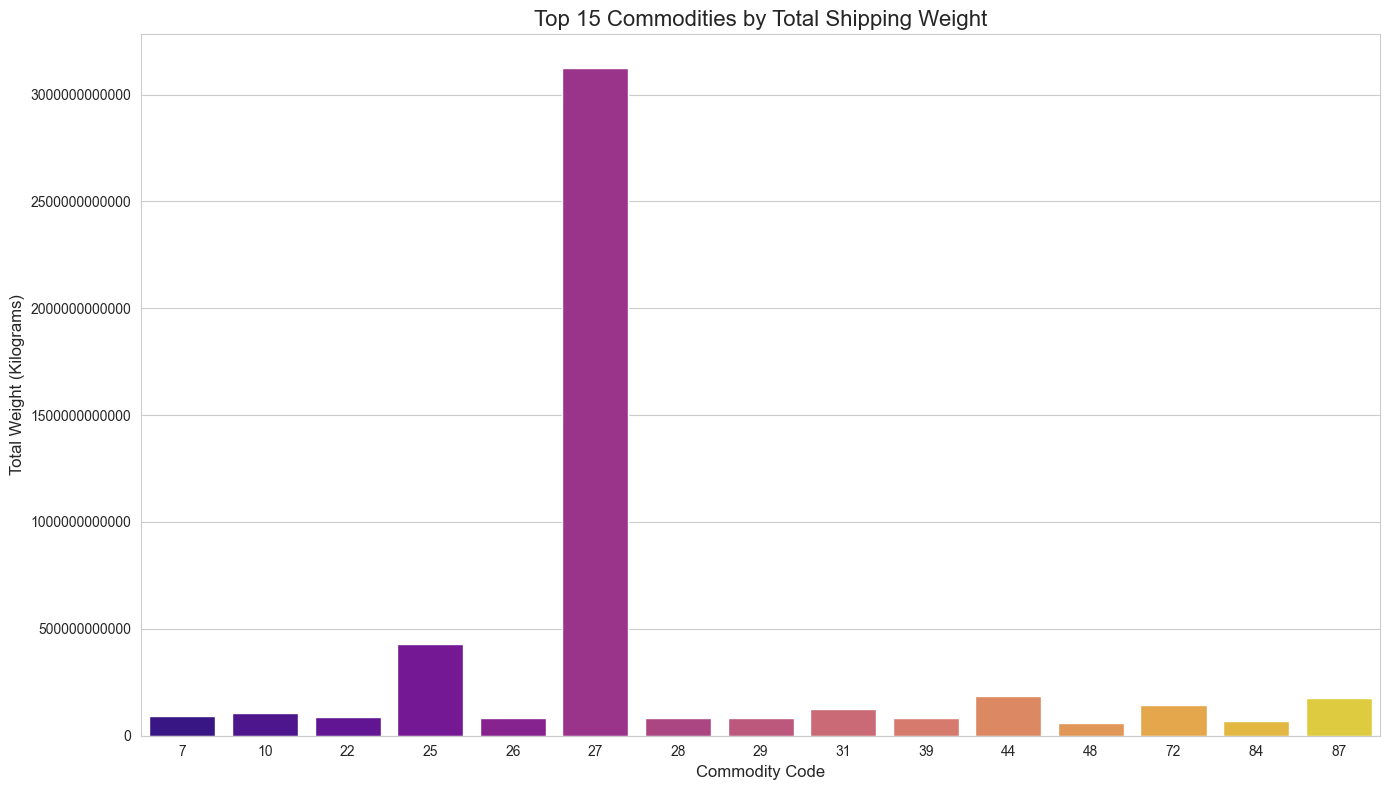

In [163]:
# Plotting Top 15 Commodities by Weight

plt.figure(figsize=(14, 8))
sns.barplot(x='COMMODITY2', y='SHIPWT', data=commodity_summary_sorted_weight, palette='plasma')
plt.title('Top 15 Commodities by Total Shipping Weight', fontsize=16)
plt.xlabel('Commodity Code', fontsize=12)
plt.ylabel('Total Weight (Kilograms)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

> - Commodity code 27 ( Mineral fuels, mineral oils and products of their distillation; Bituminous substances; Mineral waxes) has a very high level in both value and weight. 

> - Commodity code 87 (Vehicles, other than railway or tramway rolling stock, and parts and accessories thereof) has the highest shipment by value but low shipment by weight. 

> - Commodities 84 (Nuclear reactors, boilers, machinery and mechanical appliances; parts thereof) and 85 ( Electrical machinery and equipment and parts thereof; Sound recorders and reproducers, television image and sound recorders and reproducers, and parts and accessories of such articles) have moderately high shipment value but extremely low shipment weight. This indicates that the commodities are light weight goods of high value

### 6. Conclusion and Recommendation<a id='cr'></a>

[Move Up](#mu)

This analysis of TransBorder Freight Data, spanning from 2020 to 2024, has provided valuable insights into the dynamics of trade between the United States, Canada, and Mexico. Leveraging the CRISP-DM methodology, we have cleaned, preprocessed, and explored the dataset to uncover key patterns, potential inefficiencies, and areas for improvement.

**Key Insights from Exploratory Data Analysis (EDA)**
1. Trade Type Dynamics:

    - While the number of export shipments is higher, the total value and weight of import shipments significantly exceed exports. This suggests that imported goods are generally of higher individual value and greater physical volume, potentially comprising raw materials or heavier manufactured goods.
     ** **

2. Dominance of Transportation Modes:

    - Trucking is the undisputed leader in terms of the number of shipments and total economic value for transborder freight. Its flexibility and extensive network make it the primary choice for a wide range of goods.

    - For total physical weight, Vessel and Pipeline transportation are paramount, indicating their critical role in moving bulk commodities (e.g., oil, gas, minerals) where volume is the primary factor.

    - Rail transportation holds a strong second position in both value and weight, particularly for Canadian trade.
     ** **

3. Geographical Hotspots and Trade Corridors:

    - Texas (TX) is the most significant U.S. state for transborder freight in terms of both value and weight among the known states, serving as a major gateway to Mexico.

    - Ontario (XO) is the leading Canadian province by value, reflecting its industrial ties, while Alberta (XA) dominates by weight, largely due to energy exports.

    - Mexican trade is concentrated in states bordering the U.S., though a significant portion of Mexican state data is unclassified ("XX").

    - Data Limitation: A substantial portion of geographical data (U.S. States, Mexican States, Canadian Provinces) is classified as "UNKNOWN" or generic codes, limiting granular regional analysis.
     ** **

4. Temporal Trends and Economic Resilience:

    - The data clearly shows a sharp decline in freight value and weight in early to mid-2020, directly correlating with the onset of the COVID-19 pandemic.

    - Following this initial disruption, there has been a strong and sustained recovery and growth in transborder freight activity through 2021, 2022, and 2023, reaching levels higher than pre-pandemic. This demonstrates the resilience of the North American supply chain.

    - Specific monthly patterns by mode indicate that while overall trends follow economic cycles, individual modes might have unique seasonal fluctuations.
     ** **

5. Commodity Flow:

    - Vehicles (87), Mineral Fuels (27), and Machinery (84, 85) are the highest-value commodities, reflecting the importance of manufacturing and energy trade.

    - Mineral Fuels (27), Salt/Sulfur/Earths/Stone (25), and Wood (44) dominate in terms of physical weight, highlighting the movement of raw materials and bulk goods.

    - There's a clear distinction: high-value manufactured goods (vehicles, machinery) drive value, while bulk commodities (fuels, minerals, wood) drive weight.
     ** **

6. Freight Charge Dynamics:

    - Air and "Other" modes have the highest average freight charges per kilogram, which is expected for expedited or specialized services.

    - Pipeline and Rail are the most cost-efficient modes per kilogram, reinforcing their role in bulk transport.

    - The relationship between freight charges and value/weight can be complex; further investigation is needed to pinpoint specific inefficiencies beyond these high-level averages.

**Recommendations**

Based on these insights, here are actionable recommendations to enhance the performance, sustainability, and safety of transborder transportation systems:


1. Optimize Trucking Operations:

    - Recommendation: Given trucking's overwhelming dominance in shipment count and value, focus on optimizing truck routes, reducing border wait times, and improving road infrastructure at key border crossings (e.g., Texas-Mexico, Michigan-Ontario).

    - Why: Even small improvements in efficiency for trucking will yield significant overall benefits due to its sheer volume.

    - Impact: Reduced transit times, lower operational costs for businesses, decreased congestion, and improved throughput.
    ** **

2. Leverage Rail and Pipeline for Bulk Efficiency:

    - Recommendation: Encourage and invest in expanding rail and pipeline capacity, especially for high-weight commodities like mineral fuels, metals, and agricultural products, particularly for trade with Canada (Alberta's weight dominance).

    - Why: These modes offer superior cost-efficiency for bulk transport and can alleviate road congestion.

    - Impact: Lower per-unit shipping costs for bulk goods, reduced environmental footprint compared to trucking for heavy loads, and increased capacity for high-volume trade.
    ** **

3. Address Data Gaps for Granular Analysis:

    - Recommendation: Implement stricter data collection protocols to minimize "UNKNOWN" or generic codes for U.S. States, Mexican States, and Canadian Provinces, and ensure SHIPWT data is consistently recorded for all Mexican shipments.

    - Why: More complete geographical and weight data would enable more precise routing optimization, infrastructure planning, and a deeper understanding of specific trade corridors and their challenges.

    - Impact: Improved data-driven decision-making, more targeted policy interventions, and better resource allocation.  
    ** **

4. Monitor Economic Resilience and Adaptability:

    - Recommendation: Continue to monitor temporal trends closely, especially in light of global economic shifts or unforeseen events. Develop contingency plans based on the observed resilience and recovery patterns post-COVID-19.

    - Why: Understanding the system's response to past disruptions can inform strategies for future crises, ensuring supply chain stability.

    - Impact: Enhanced supply chain resilience, quicker recovery from disruptions, and minimized economic impact during crises.
     ** **

5. Investigate High-Cost Freight Segments:

    - Recommendation: Conduct deeper analysis into the specific factors contributing to high freight charges per value/weight for "Pipeline," "Vessel," "Air," and "Other" modes. This might involve looking at specific commodities, distances, or specialized handling requirements.

    - Why: Identifying the root causes of higher costs can reveal opportunities for negotiation, alternative logistics solutions, or technological improvements.

    - Impact: Improved cost-efficiency for high-value/specialized freight, potential for innovation in logistics services.
     ** **

6. Future Data Collection for Sustainability and Safety:

    - Recommendation: To address the "Environmental Impact" and "Safety and Risk Assessment" objectives fully, future data collection should include metrics such as:

        - Emissions data: Fuel consumption per mode, carbon footprint.

        - Safety incident data: Number of accidents, causes, fatalities, injuries by mode and route.

        - Delay/Congestion data: Average transit times, border wait times, and frequency of delays.

    - Why: Direct data on these aspects is critical for developing targeted strategies for sustainability and safety improvements.

    - Impact: Enables data-driven policies for reducing environmental impact (e.g., promoting greener modes, optimizing fuel use) and enhancing safety protocols, leading to fewer incidents and a more secure transportation network.

This comprehensive analysis provides a strong foundation for stakeholders to make informed decisions and implement strategies that enhance the efficiency, sustainability, and safety of North American transborder freight operations.
